# Machine Learning project on predicting deal probability for Avito online ads


![](https://imgur.com/e1HUoqw.png)

## For Avito Demand Prediction Challenge
### By Deepa Sarojam, August 2021

# Introduction
When selling used goods online, a combination of tiny, nuanced details in a product description can make a big difference in drumming up interest. 

Avito, Russia’s largest classified advertisements website is challenging to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.

Source: https://www.kaggle.com/c/avito-demand-prediction

## Data Description :

## File and column descriptions
- **train.csv** - Train data.
  - item_id - Ad id.
  - user_id - User id.
  - region - Ad region.
  - city - Ad city.
  - parent_category_name - Top level ad category as classified by Avito's ad model.
  - category_name - Fine grain ad category as classified by Avito's ad model.
  - param_1 - Optional parameter from Avito's ad model.
  - param_2 - Optional parameter from Avito's ad model.
  - param_3 - Optional parameter from Avito's ad model.
  - title - Ad title.
  - description - Ad description.
  - price - Ad price.
  - item_seq_number - Ad sequential number for user.
  - activation_date- Date ad was placed.
  - user_type - User type.
  - image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.
  - image_top_1 - Avito's classification code for the image.
  - **deal_probability** - The target variable. This is the likelihood that an ad - actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.
- **test.csv** - Test data. Same schema as the train data, minus deal_probability.

# Evaluation Criteria
The regression model should be evaulated for Root Mean Squared Error 𝑅𝑀𝑆𝐸. 

RMSE is defined as:
 


$$\ {RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} 𝑦𝑖−𝑦̂ 𝑖^2}$$

  
where y hat is the predicted value and y is the original value.

# Summary
In this notebook we will explore ***Supervised Machine Learning methods***. Regression models such as linear regression, Ridge, ElasticNet, Lasso, decision tree and ensemble models such as RandomForest, XGBoost, LightGBM will trained to predict weekly sales using **Scikit Learn**, **LightGBM** and **XGBoost**.  We will use **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** and **Plotly** to perform exploratory data analysis and gather insights for machine learning. We will do the following

- Install and Import libraries
- Explore the dataset and merge different files as required
- Translate the business problem to a machine learning problem
- EDA - exploratory data analysis
- Feature Engineering
- Data preparation - Train Val Split, Encoding, Imputing and Scaling
- Select input features
- Define evaluation criteria (here. RMSE - as defined above)
- Define baseline model
- Select best model (without hyperparameter tuning)
- Hyperparameter tuning for select models
- Make predictions
- Save the best model
- Summarise insights and learnings

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

# Loading the dataset

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="online-ad-demand-prediction-ml-prj")

In [ ]:
!pip install opendatasets numpy==1.19.2 pandas==1.1.5 matplotlib===3.1.1 seaborn WordCloud plotly==4.7.1 folium==0.2.1 imgaug==0.2.5 graphviz --upgrade --quiet

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

#Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Import library to download data from Kaggle
import opendatasets as od

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

import matplotlib
%matplotlib inline

# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deepasarojam21","key":"aed110d89663d0255db0e4813360d680"}'}

In [ ]:
import gc
gc.collect()

160

## Download the files

In [ ]:
! kaggle competitions download avito-demand-prediction -f train.csv  
! kaggle competitions download avito-demand-prediction -f test.csv 
! kaggle competitions download avito-demand-prediction -f sample_submission.csv

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Exceute this cell ONLY if the above cell (Download the files) throws an error. Run this cell and then re-execute the above cell.
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! unzip train.csv # ! unzip train_active.csv 
! unzip test.csv # ! unzip test_active.csv 
! unzip sample_submission.csv # ! unzip sample_submission.csv 

Archive:  train.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  test.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  sample_submission.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.


## Read the file and convert to csv format

In [ ]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

train_df = pd.read_csv("train.csv")
print('train len', len(train_df))


train len 1503424


In [ ]:
test_df = pd.read_csv("test.csv")
print('test len', len(test_df))

test len 508438


The train dataset is `1503424` and the test dataset is `508438`. 

In [ ]:
import gc
gc.collect()

94

## Getting Basic Idea About Data


In [ ]:
train_df.sample(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
80487,fd1c0994c316,668b3a062c98,Ростовская область,Батайск,Бытовая электроника,Ноутбуки,NaN,NaN,NaN,Ноутбук Siemens Amilo PI 2540,Продаю ноутбук Fujitsu Siemens Amilo PI 2540/\...,7000.0,270,2017-03-28,Company,80b3c636c83fbf8ab532ed21b28cda53ce9854959ea56c...,2947.0,0.76786
224920,1ce8d5aca445,a23753d5bce8,Саратовская область,Саратов,Услуги,Предложение услуг,Другое,NaN,NaN,Грузчики разнорабочие,"физически крепкие молодые люди. вежливые, без ...",NaN,1,2017-03-21,Private,NaN,NaN,0.20000
653020,be5bf9485c67,aefa5161ed13,Иркутская область,Ангарск,Для дома и дачи,Мебель и интерьер,Шкафы и комоды,NaN,NaN,Сундук,Старый сундук. Самовывоз. Помогу погрузить.,50.0,2,2017-03-18,Private,500d39ccea226b90743be8dbd44c09ec4072095b5c7fd7...,2474.0,0.86521
546239,d41bf92e07d2,e66e2c489e06,Удмуртия,Воткинск,Недвижимость,Квартиры,Сдам,На длительный срок,2,"2-к квартира, 55 м², 3/5 эт.","Сдам квартиру на длительный срок , в хорошем с...",NaN,3,2017-03-26,Private,2be89745e130b5300b11e57750989f46bb8100f02f7281...,2220.0,0.66121
1005952,fd7187f9e74f,047d27fa4473,Краснодарский край,Новороссийск,Для дома и дачи,Мебель и интерьер,Шкафы и комоды,NaN,NaN,Прихожая Метида,Прихожая Метида/\nРазмеры: 1700х2204х420 мм/\n...,8960.0,744,2017-03-20,Company,5f619748ee1c1c4bc99bbe20711242c84d7a2a059b4d70...,1483.0,0.00000


In [ ]:
test_df.sample(5)

,region,city,parent_category_name,category_name,param_1,title,price,user_type,image_top_1,month,dayofmonth,year,dayofweek,isweekend
item_id,,,,,,,,,,,,,,
03e76f1ddc4f,17,1233,0,41,29,42043,0.000381,0,2925,0,2,0,4,0
44e11bcb921e,18,1238,4,10,108,122137,0.000012,1,43,0,6,0,1,0
9df9f8d0616a,10,91,4,10,108,213889,0.000011,1,621,0,3,0,5,1
4c542168bcfc,12,994,8,40,268,208656,0.000044,1,2645,0,4,0,6,1
5d6177d535d4,27,1635,7,34,139,142027,-0.002381,1,2736,0,3,0,5,1


# Data Wrangling 


In [ ]:
%%time
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   item_id               1503424 non-null  object 
 1   user_id               1503424 non-null  object 
 2   region                1503424 non-null  object 
 3   city                  1503424 non-null  object 
 4   parent_category_name  1503424 non-null  object 
 5   category_name         1503424 non-null  object 
 6   param_1               1441848 non-null  object 
 7   param_2               848882 non-null   object 
 8   param_3               640859 non-null   object 
 9   title                 1503424 non-null  object 
 10  description           1387148 non-null  object 
 11  price                 1418062 non-null  float64
 12  item_seq_number       1503424 non-null  int64  
 13  activation_date       1503424 non-null  object 
 14  user_type             1503424 non-

In [ ]:
%%time
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   item_id               508438 non-null  object 
 1   user_id               508438 non-null  object 
 2   region                508438 non-null  object 
 3   city                  508438 non-null  object 
 4   parent_category_name  508438 non-null  object 
 5   category_name         508438 non-null  object 
 6   param_1               485528 non-null  object 
 7   param_2               275209 non-null  object 
 8   param_3               202107 non-null  object 
 9   title                 508438 non-null  object 
 10  description           508438 non-null  object 
 11  price                 477853 non-null  float64
 12  item_seq_number       508438 non-null  int64  
 13  activation_date       508438 non-null  object 
 14  user_type             508438 non-null  object 
 15  

Selecting the columns from the train and test dataframes. Eliminating 'item_seq_number'. 

In [ ]:
selected_columns = ['item_id', 
                    'user_id', 
                    'region', 
                    'city', 
                    'parent_category_name', 
                    'category_name',
                    'param_1',
                    'param_2',
                    'param_3',
                    'title', 
                    'description',
                    'price',
                    'activation_date',
                    'user_type',
                    'image_top_1',
                    'deal_probability']

selected_dtypes = {
    'price': 'float32',
    'user_type': 'category'
}


In [ ]:
select_columns = ['item_id', 
                  'user_id', 
                  'region', 
                  'city', 
                  'parent_category_name', 
                  'category_name', 
                  'param_1',
                  'param_2',
                  'param_3', 
                  'title', 
                  'description', 
                  'price',
                  'activation_date',
                  'user_type',
                  'image_top_1']

selected_dtypes = {
    'price': 'float32',
    'user_type': 'category'
}


In [ ]:
%%time 
# Loading the data with selected columns, selected dtypes and parse_dates
train_df = pd.read_csv('/content/train.csv',
                        usecols=selected_columns,
                        dtype=selected_dtypes,
                        index_col='item_id',
                        parse_dates=['activation_date']
)

CPU times: user 15.1 s, sys: 2.53 s, total: 17.6 s
Wall time: 17.6 s


The train data was loaded in `319ms`.

In [ ]:
%%time 
# Loading the data with selected columns, selected dtypes and parse_dates
test_df = pd.read_csv('/content/test.csv', 
                      usecols=select_columns,
                      dtype=selected_dtypes,
                      index_col='item_id',
                      parse_dates=['activation_date']
)

CPU times: user 5.07 s, sys: 241 ms, total: 5.31 s
Wall time: 5.3 s


The test data was loaded in `298ms`.



In [ ]:
import gc
gc.collect()

44

In [ ]:
train_df = train_df.sample(frac =.70)

In [ ]:
len(train_df), len(test_df)

(1052397, 508438)

In [ ]:
train_df.head()

,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,image_top_1,deal_probability
item_id,,,,,,,,,,,,,,,
b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2017-03-28,Private,1008.0,0.12789
2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,2017-03-26,Private,692.0,0.00000
ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,2017-03-20,Private,3032.0,0.43177
02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,2017-03-25,Company,796.0,0.80323
7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,2017-03-16,Private,2264.0,0.20797


## Eliminate variables with more than 20% of missingness


In [ ]:
train_df.isnull().mean() < 0.2

user_id                  True
region                   True
city                     True
parent_category_name     True
category_name            True
param_1                  True
param_2                 False
param_3                 False
title                    True
description              True
price                    True
activation_date          True
user_type                True
image_top_1              True
deal_probability         True
dtype: bool

In [ ]:
len(train_df.columns[train_df.isnull().mean() < 0.2])

13

In [ ]:
train_df.isnull().isna().sum()

user_id                 0
region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
title                   0
description             0
price                   0
activation_date         0
user_type               0
image_top_1             0
deal_probability        0
dtype: int64

In [ ]:
train_df = train_df[train_df.columns[train_df.isnull().mean() < 0.2]] # Eliminating data with less than 20% data

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

# Dropping duplicates from train and test data


In [ ]:
train_df[train_df.duplicated()]

,user_id,region,city,parent_category_name,category_name,param_1,title,description,price,activation_date,user_type,image_top_1,deal_probability
item_id,,,,,,,,,,,,,
1b373f278e26,de5f68d1805d,Красноярский край,Красноярск,Личные вещи,"Одежда, обувь, аксессуары",Мужская одежда,Мужской свитшот Reebok,Размерный ряд : 46-54/\nДоставка по городу : 2...,1990.0,2017-03-19,Company,629.0,0.0
17b228302d8d,7567886ce221,Новосибирская область,Новосибирск,Личные вещи,Детская одежда и обувь,Для девочек,Платье,Смотреть на выборной,150.0,2017-03-28,Private,82.0,0.0
ae0059b91730,6240fe9ae566,Самарская область,Тольятти,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",Караоке,NaN,1500.0,2017-03-21,Private,3042.0,0.0
5d34ef478959,b07ec089138a,Оренбургская область,Бузулук,Личные вещи,"Одежда, обувь, аксессуары",Мужская одежда,Мужская рубашка,NaN,400.0,2017-03-16,Company,635.0,0.0
252b8eff8c36,cdb2525d867a,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Брюки,NaN,50.0,2017-03-17,Private,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0c991770071b,972306098072,Саратовская область,Энгельс,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы размер 30,NaN,500.0,2017-03-21,Private,567.0,0.0
d1b0a21e9e60,77bcfcf964f4,Удмуртия,Ижевск,Личные вещи,"Одежда, обувь, аксессуары",Мужская одежда,Рубашка Tommy Hilfiger,"Оригинал, в отличном состоянии.",800.0,2017-03-20,Private,635.0,0.0
e20eabccd509,d6c7302fcebd,Ростовская область,Ростов-на-Дону,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы Frankie morello,NaN,2500.0,2017-03-20,Private,567.0,0.0


In [ ]:
train_df.drop_duplicates(inplace=True)

`1948 rows` duplicated rows are removed.

In [ ]:
train_df.user_type.value_counts()

Private    1074792
Company     346691
Shop         80343
Name: user_type, dtype: int64

In [ ]:
test_df.user_type.value_counts()

Private    358259
Company    119949
Shop        30230
Name: user_type, dtype: int64

# Feature Engineering

Fetching the month, day of month, year, day of week and is a weekend fields from the activation date. 

In [ ]:
train_df['month'] = train_df.activation_date.dt.month
train_df['dayofmonth'] = train_df.activation_date.dt.day
train_df['year'] = train_df.activation_date.dt.year
train_df['dayofweek'] = train_df.activation_date.dt.weekday
train_df['isweekend'] = (train_df.activation_date.dt.weekday > 4).astype(int)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501476 entries, b912c3c6a6ad to 9ad3b7bff1db
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   user_id               1501476 non-null  object        
 1   region                1501476 non-null  object        
 2   city                  1501476 non-null  object        
 3   parent_category_name  1501476 non-null  object        
 4   category_name         1501476 non-null  object        
 5   param_1               1439929 non-null  object        
 6   title                 1501476 non-null  object        
 7   description           1385979 non-null  object        
 8   price                 1416187 non-null  float32       
 9   activation_date       1501476 non-null  datetime64[ns]
 10  user_type             1501476 non-null  category      
 11  image_top_1           1388897 non-null  float64       
 12  deal_probability      1501476 n

In [ ]:
test_df['month'] = test_df.activation_date.dt.month
test_df['dayofmonth'] = test_df.activation_date.dt.day
test_df['year'] = test_df.activation_date.dt.year
test_df['dayofweek'] = test_df.activation_date.dt.weekday
test_df['isweekend'] = (test_df.activation_date.dt.weekday > 4).astype(int)

In [ ]:
train_shape = train_df.shape
test_shape = test_df.shape

print("Shape of train data:", train_shape)
print("Shape of test data:", test_shape)

Shape of train data: (1501826, 20)
Shape of test data: (508438, 19)


In [ ]:
train_dtype = train_df.dtypes
test_dtype = test_df.dtypes

print("Data type of train data:\n", train_dtype)
print("-----------------------------------------\n")

print("\n Data type of test data:\n", test_dtype)

Data type of train data:
 user_id                         object
region                          object
city                            object
parent_category_name            object
category_name                   object
param_1                         object
title                           object
description                     object
price                          float32
activation_date         datetime64[ns]
user_type                     category
image_top_1                    float64
deal_probability               float64
month                            int64
dayofmonth                       int64
year                             int64
dayofweek                        int64
isweekend                        int64
dtype: object
-----------------------------------------


 Data type of test data:
 user_id                         object
region                          object
city                            object
parent_category_name            object
category_name                   

In [ ]:
#Statstical Summary
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
train_desc = train_df.describe()

print(train_desc)

           price  image_top_1  deal_probability      month  dayofmonth       year  dayofweek  \
count  1.416e+06    1.389e+06         1.501e+06  1.501e+06   1.501e+06  1.501e+06  1.501e+06   
mean   3.162e+05    1.243e+03         1.393e-01  3.000e+00   2.156e+01  2.017e+03  2.942e+00   
std    6.693e+07    9.704e+02         2.602e-01  2.448e-03   4.046e+00  0.000e+00  2.031e+00   
min    0.000e+00    0.000e+00         0.000e+00  3.000e+00   1.000e+00  2.017e+03  0.000e+00   
25%    5.000e+02    4.250e+02         0.000e+00  3.000e+00   1.800e+01  2.017e+03  1.000e+00   
50%    1.300e+03    1.057e+03         0.000e+00  3.000e+00   2.200e+01  2.017e+03  3.000e+00   
75%    7.000e+03    2.217e+03         1.512e-01  3.000e+00   2.500e+01  2.017e+03  5.000e+00   
max    7.950e+10    3.066e+03         1.000e+00  4.000e+00   3.100e+01  2.017e+03  6.000e+00   

       isweekend  
count  1.501e+06  
mean   2.810e-01  
std    4.495e-01  
min    0.000e+00  
25%    0.000e+00  
50%    0.000e+00  
75

## Correlations between variables

Correlations refers to the relationship between two variables and how they might or might not change with respect to eachother. 

                      price  image_top_1  deal_probability      month  dayofmonth  year  \
price             1.000e+00        0.034        -1.100e-03 -8.954e-06   8.077e-05   0.0   
image_top_1       3.438e-02        1.000         1.898e-01  1.503e-03   5.706e-03   0.0   
deal_probability -1.100e-03        0.190         1.000e+00  3.554e-03  -2.398e-03   0.0   
month            -8.954e-06        0.002         3.554e-03  1.000e+00  -1.157e-02   0.0   
dayofmonth        8.077e-05        0.006        -2.398e-03 -1.157e-02   1.000e+00   0.0   
year              0.000e+00        0.000         0.000e+00  0.000e+00   0.000e+00   0.0   
dayofweek        -1.174e-03       -0.025         2.164e-03  1.409e-03  -1.302e-01   0.0   
isweekend        -1.431e-03       -0.030         6.541e-04  2.100e-03   7.281e-02   0.0   

                  dayofweek  isweekend  
price                -0.001 -1.431e-03  
image_top_1          -0.025 -2.997e-02  
deal_probability      0.002  6.541e-04  
month           

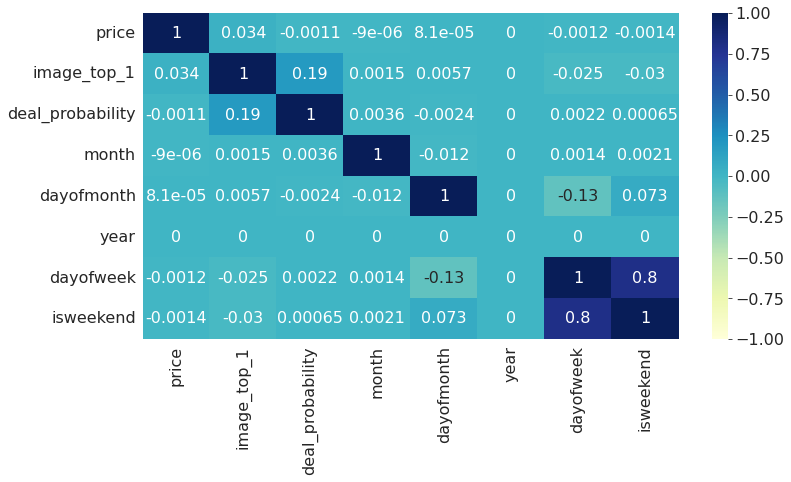

In [ ]:
set_option('display.width', 100)
set_option('precision', 3)
 
# Correlation Matrix formation
corr_matrix = train_df.corr(method='pearson')
corr_matrix.fillna(0, inplace=True) #imputing the Nan with 0
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1);

## Checking the skew of data

In [ ]:
skew = train_df.skew()
print(skew)

price               1183.13916016
image_top_1            0.41803623
deal_probability       1.90297516
month                408.44583484
dayofmonth            -0.00551763
year                   0.00000000
dayofweek              0.06029439
isweekend              0.97421956
dtype: float64


The skew result shows a postive correlation for `price`, `month`, `year` has positive (right) skew and `dayofweek` also has a close to zero has less skew. `dayofmonth` has a negative (left) skew.  
- A skewness value of 0 in the output denotes a symmetrical distribution of values.
- A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.
- A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

In [ ]:
jovian.commit()

# Plot the skewness

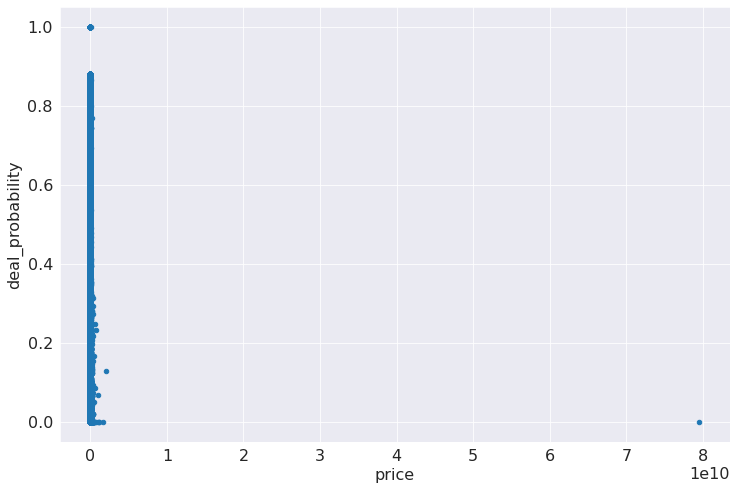

In [ ]:
train_df.plot(kind='scatter', x='price', y='deal_probability', figsize=(12, 8))
plt.show();

## Checking the statistics of the price column

In [ ]:
train_df.price.min(), train_df.price.max(), train_df.price.std()

(0.0, 79501008896.0, 66934920.0)

## Remove the outlier value from price column

In [ ]:
len(train_df)

1501826

Choosing a higher and lower values from the above scatter plot
Higher = 420M
Lower = 60M

In [ ]:
# train_df.loc[train_df.price > 79501008896.0]
min_val = 0
max_val = 42100889
train_df = train_df[(train_df.price > min_val) & (train_df.price < max_val)]
train_df.head()

,user_id,region,city,parent_category_name,category_name,param_1,title,description,price,activation_date,user_type,image_top_1,deal_probability,month,dayofmonth,year,dayofweek,isweekend
item_id,,,,,,,,,,,,,,,,,,
f2b616e25068,68ca41863ac8,Волгоградская область,Волгоград,Транспорт,Грузовики и спецтехника,Тягачи,Фрэдлайнер (сцепка),"Фрэдлайнер 2001г./\nДвигатель- детройт 12,7./\...",900000.0,2017-03-28,Private,1057.0,0.51310,3,28,2017,1,0
90acdc428e5e,083dcaf7b315,Новосибирская область,Новосибирск,Хобби и отдых,Коллекционирование,Другое,Самовар лот 218,Самовар Братья Шемарины 1878 года/\nОбъем 10 л...,27000.0,2017-03-27,Company,1698.0,0.00000,3,27,2017,0,0
efdd39b640e6,1a1b4205c41c,Башкортостан,Стерлитамак,Бытовая электроника,Телефоны,Meizu,Meizu m1 note,Общие характеристики/\n/\nТип/\n/\nсмартфон/\n...,6800.0,2017-03-20,Private,1033.0,0.22097,3,20,2017,0,0
ade90966bfa1,c61f8b4d82b3,Ханты-Мансийский АО,Сургут,Недвижимость,Квартиры,Продам,"3-к квартира, 86 м², 13/15 эт.",Продается шикарная 3х комнатная квартира в одн...,6500000.0,2017-03-17,Shop,1191.0,0.07332,3,17,2017,4,0
aca9e6d62eeb,4348147ec6b2,Татарстан,Казань,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы для беременных,"В отличном состоянии, покупала за 2000р,продаю...",500.0,2017-03-23,Private,567.0,0.00000,3,23,2017,3,0


In [ ]:
px.histogram(train_df, x='region', color='deal_probability')

In [ ]:
px.histogram(train_df, x='city', color='deal_probability')

In [ ]:
px.scatter(train_df, x='price', y='year')

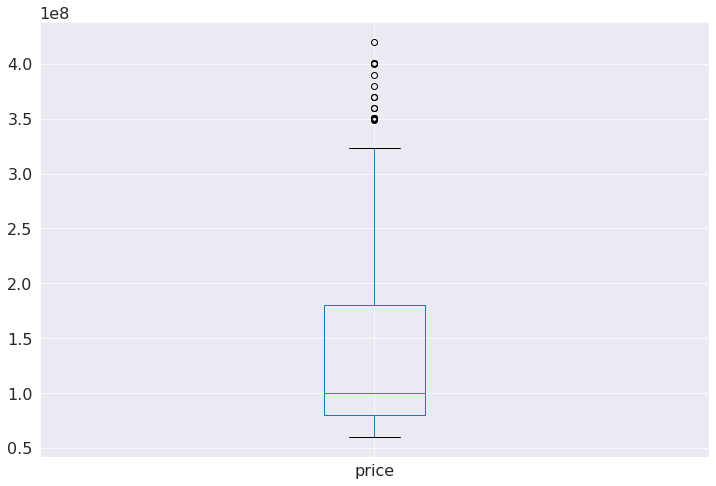

In [ ]:
train_df.price.plot(kind='box', figsize=(12, 8))
plt.show()

In [ ]:
train_df.deal_probability.isna().sum()

0

There is no missing data for the target column - `deal_probability`. 

In [ ]:
train_df['year'].value_counts()

2017    1411044
Name: year, dtype: int64

All the train and test data are for the year of `2017`. 

In [ ]:
train_df.month.value_counts()

3    1411035
4          9
Name: month, dtype: int64

All the data are for the month of `March` and `April`.


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508438 entries, 6544e41a8817 to d374d332992f
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               508438 non-null  object        
 1   region                508438 non-null  object        
 2   city                  508438 non-null  object        
 3   parent_category_name  508438 non-null  object        
 4   category_name         508438 non-null  object        
 5   param_1               485528 non-null  object        
 6   param_2               275209 non-null  object        
 7   param_3               202107 non-null  object        
 8   title                 508438 non-null  object        
 9   description           508438 non-null  object        
 10  price                 477853 non-null  float32       
 11  activation_date       508438 non-null  datetime64[ns]
 12  user_type             508438 non-null  categor

In [ ]:
set_option('display.width', 100)
set_option('precision', 3)

test_desc = test_df.describe()
print(test_desc)

           price  image_top_1     month  dayofmonth      year   dayofweek   isweekend
count  4.779e+05   465829.000  508438.0  508438.000  508438.0  508438.000  508438.000
mean   2.794e+05     1297.959       4.0      14.986    2017.0       2.764       0.231
std    5.363e+06      961.065       0.0       2.092       0.0       1.951       0.422
min    0.000e+00        0.000       4.0      12.000    2017.0       0.000       0.000
25%    5.000e+02      467.000       4.0      13.000    2017.0       1.000       0.000
50%    1.500e+03     1132.000       4.0      15.000    2017.0       3.000       0.000
75%    8.600e+03     2218.000       4.0      17.000    2017.0       4.000       0.000
max    3.000e+09     3066.000       4.0      20.000    2017.0       6.000       1.000


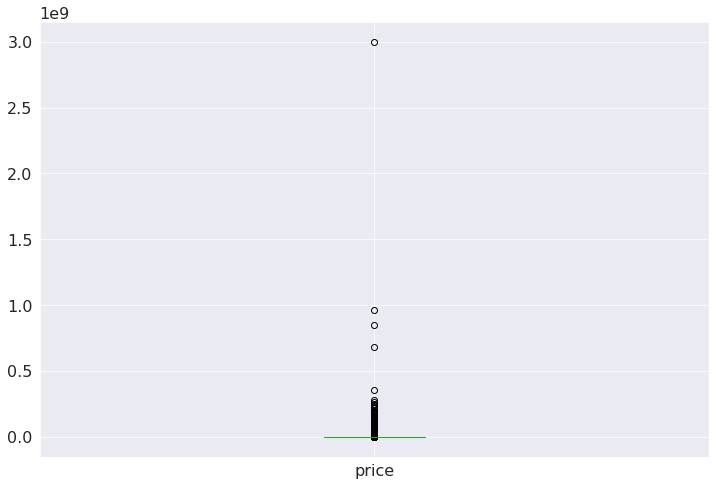

In [ ]:
test_df.price.plot(kind='box', figsize=(12, 8))
plt.show()

In [ ]:
test_df.price.min(), test_df.price.max(), test_df.price.median()

(0.0, 3000059904.0, 1500.0)

             price  image_top_1  month  dayofmonth  year  dayofweek  isweekend
price        1.000        0.043    0.0       0.002   0.0     -0.011     -0.012
image_top_1  0.043        1.000    0.0       0.021   0.0     -0.013     -0.005
month        0.000        0.000    0.0       0.000   0.0      0.000      0.000
dayofmonth   0.002        0.021    0.0       1.000   0.0     -0.298      0.135
year         0.000        0.000    0.0       0.000   0.0      0.000      0.000
dayofweek   -0.011       -0.013    0.0      -0.298   0.0      1.000      0.770
isweekend   -0.012       -0.005    0.0       0.135   0.0      0.770      1.000


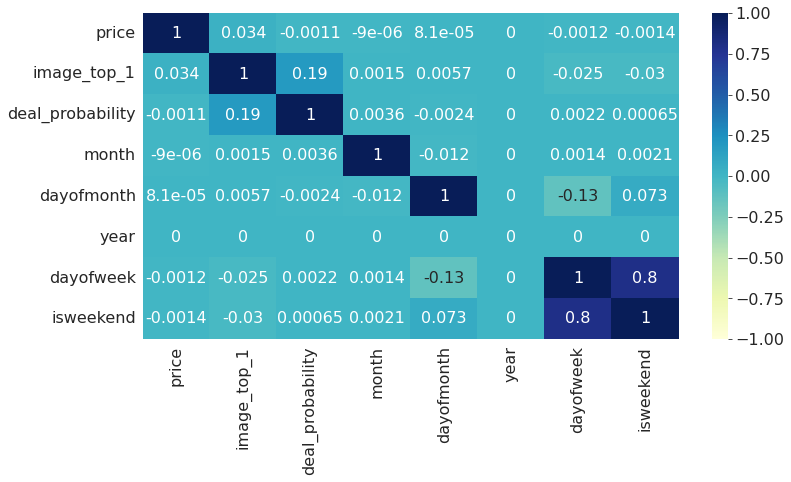

In [ ]:
set_option('display.width', 100)
set_option('precision', 3)
 
# Correlation Matrix formation
corr_test = test_df.corr(method='pearson')
corr_test.fillna(0, inplace=True) #imputing the Nan with 0
print(corr_test)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1);

In [ ]:
test_df['year'].value_counts()

2017    508438
Name: year, dtype: int64

In [ ]:
test_df.month.value_counts()

4    508438
Name: month, dtype: int64

All the data are for the month of `April`.


In [ ]:
train_df.drop(["activation_date"],axis=1,inplace=True)

In [ ]:
test_df.drop(["activation_date"],axis=1,inplace=True)

In [ ]:
# Dropping param_2 and param_3 as these columns have less than 20% missinmg values 
test_df.drop(["param_2"],axis=1,inplace=True)
test_df.drop(["param_3"],axis=1,inplace=True)

In [ ]:
import gc
gc.collect()

250

# Exploratory Data Analysis

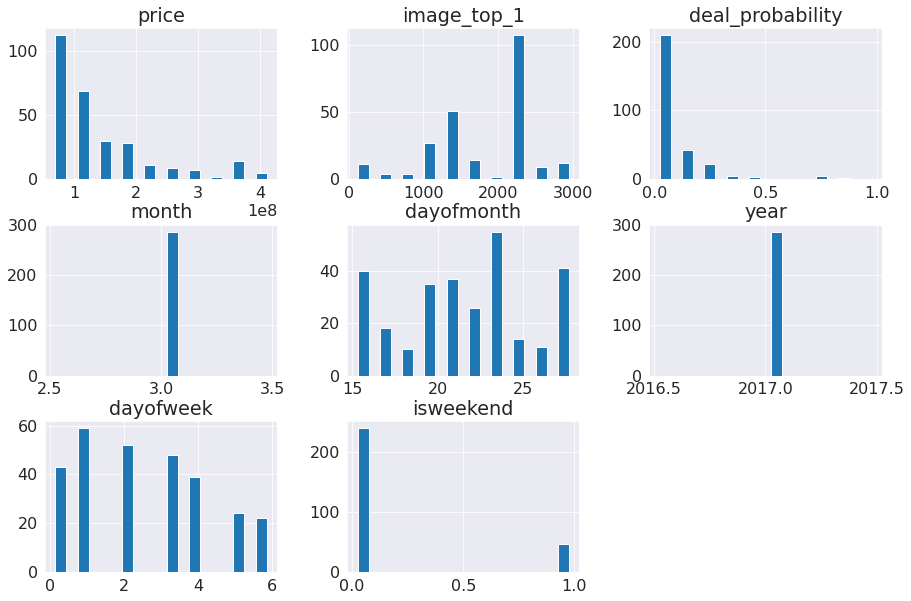

In [ ]:
from matplotlib import pyplot

train_df.hist(rwidth=0.5, figsize=(15,10))
pyplot.show();

Histogram groups data into bins and provide a count of number of observations in each bin. 
*

1.   `price` has a right skewness 
2.   `image_top_1` has the highest value around 2400
3.   `deal_probability` has highest value around 0.1
4.   `month` value of 3 (March) is only available in the train dataset
5.   `dayofmonth` in the dataset ranges from 15th to 30th
6.   `year` value of 2017 is only availabe in the train dataset
7.   `dayofweek` has acceptable values 
8.   `isweekend` also has acceptable 0, 1 values


We get similar insights from the box plot as well.

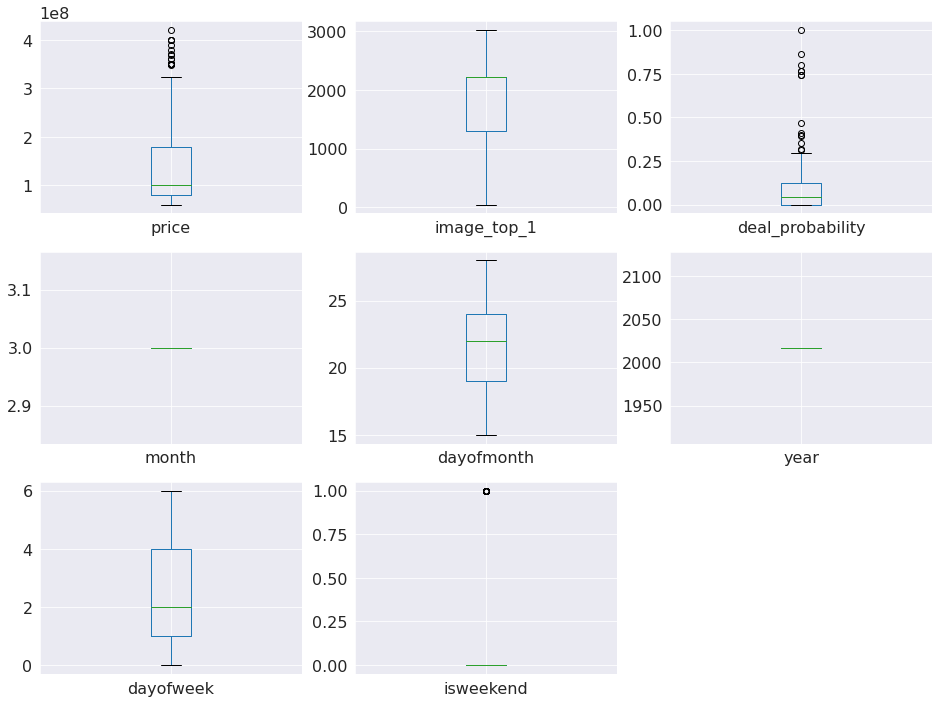

In [ ]:
train_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(16,12))
pyplot.show();

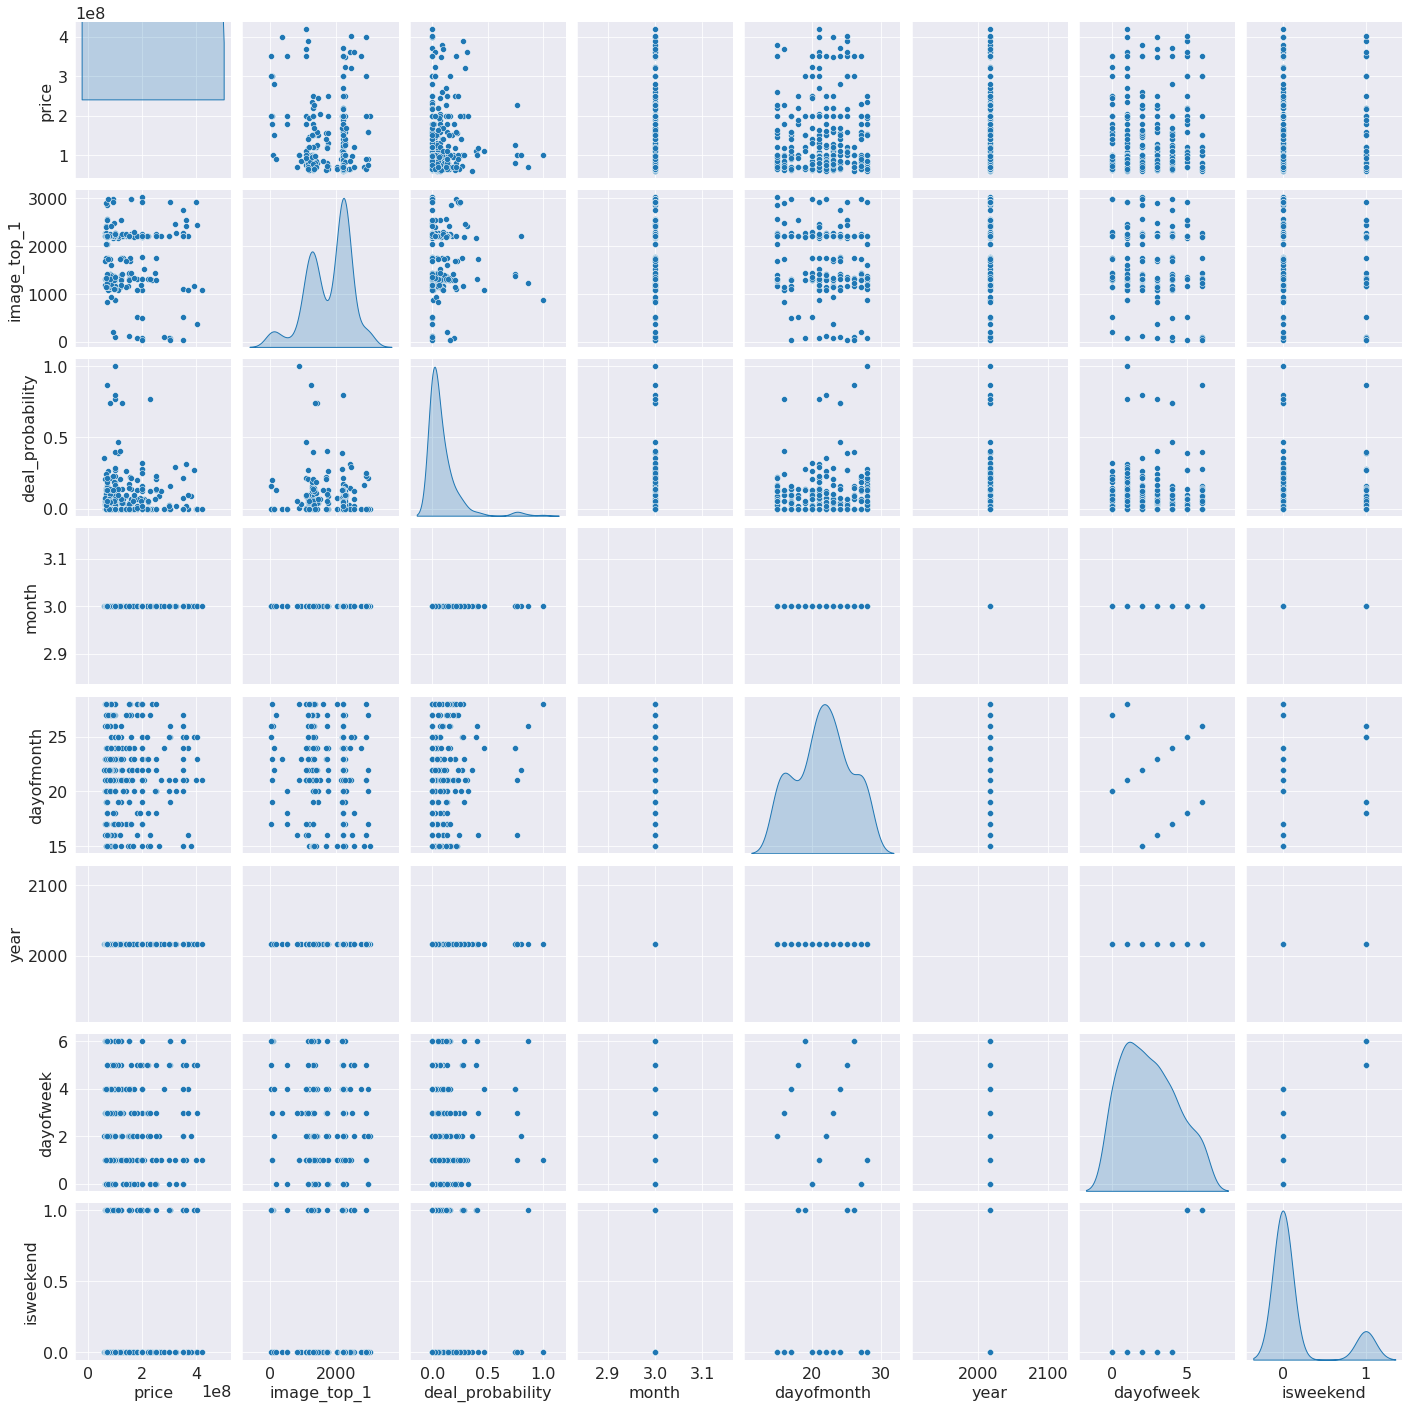

In [ ]:
##pairplots to get an intuition of potential correlations

sns.pairplot(train_df, diag_kind="kde");

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

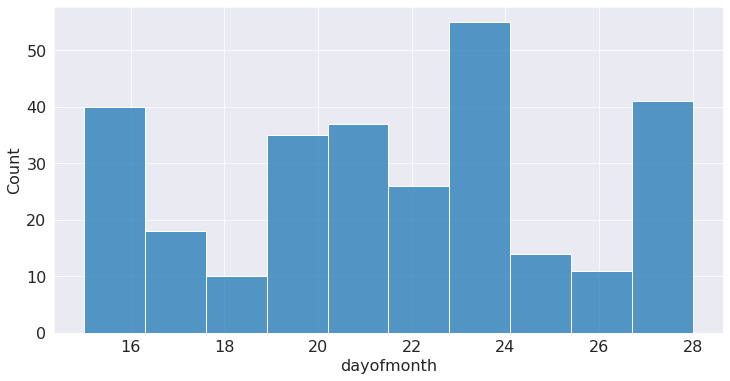

In [ ]:
sns.histplot(data=train_df, x='dayofmonth');

We see that not all days of the month the ads are activated. The days vary from 15th of the month through 28th of March (only month in the sample).

In [ ]:
train_df.dayofmonth.value_counts()

21    37
23    34
22    26
15    26
20    24
28    22
24    21
27    19
17    18
25    14
16    14
26    11
19    11
18    10
Name: dayofmonth, dtype: int64

In [ ]:
train_df['deal_probability'].isna().sum()

0

There are no null values for the target value `deal_probability` in the train data.

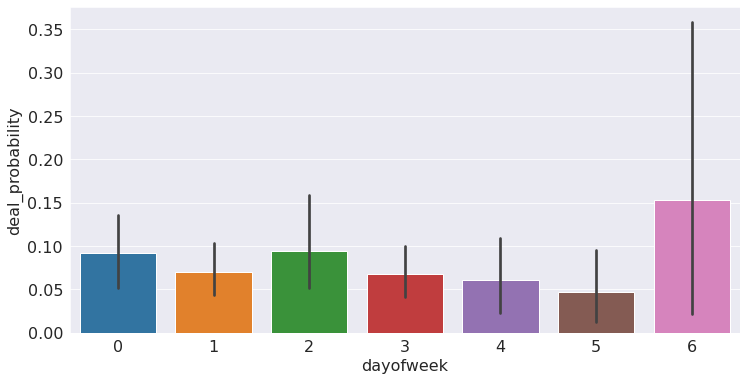

In [ ]:
sns.barplot(data=train_df, x='dayofweek', y='deal_probability');

0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday and 6 - Sunday. 

Sunday reports the maximum deal_probaliliy for the online ads followed by Wednesday. 



Let's see the distribution of the target variable `deal_probability` w.r.t other columns in the train data.

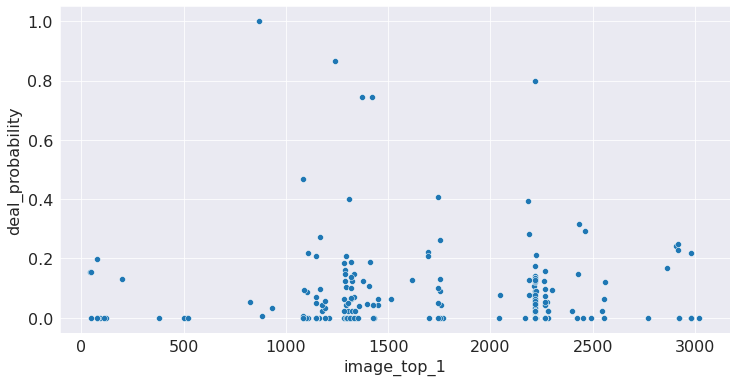

In [ ]:
sns.scatterplot(data=train_df, x='image_top_1', y='deal_probability');

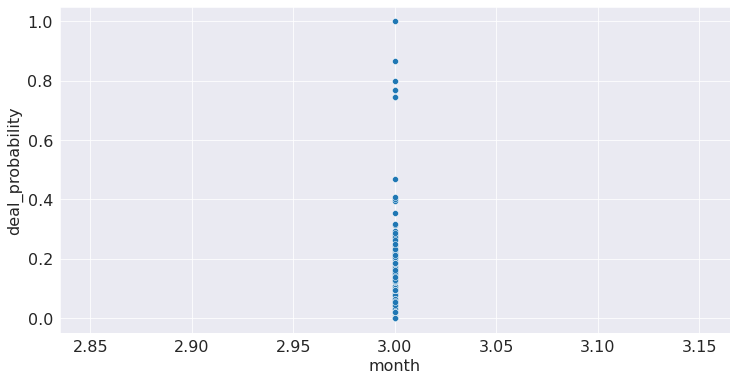

In [ ]:
sns.scatterplot(data=train_df, x='month', y='deal_probability');

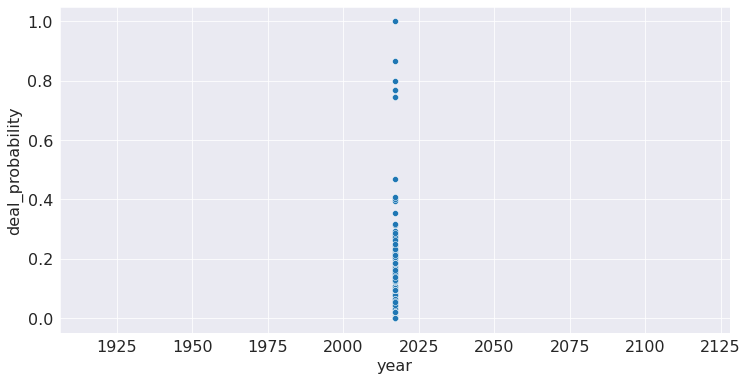

In [ ]:
sns.scatterplot(data=train_df, x='year', y='deal_probability')

In [ ]:
train_df.year.value_counts()

2017    287
Name: year, dtype: int64

As we saw before, the train data has only 2017 data for the month of March

In [ ]:
fig = px.pie(train_df, 
             names="user_type", 
             color_discrete_sequence=px.colors.sequential.Agsunset_r, 
             title='User type distribution')
fig.show();

Output hidden; open in https://colab.research.google.com to view.

71.5% of online ads are from 'Private', 23% are from 'Company' and 5.5% are from 'Shop'.

# Defining the Input and Target Columns


Dropped the 'user_id' column as this is not relevant. 

In [ ]:
# Removing user_id column 
input_cols = ['region', 
              'city', 
              'parent_category_name', 
              'category_name',  
              'param_1',
              # 'param_2',
              # 'param_3',
              'title', 
              'price',
              'user_type',
              'image_top_1',
              'month',
              'dayofmonth', 
              'year',
              'dayofweek',
              'isweekend'
              ]
target_col = 'deal_probability'

In [ ]:
inputs_df, targets = train_df[input_cols].copy(), train_df[target_col].copy()

In [ ]:
# Identify numeric and categorical columns

numeric_cols = ['price', 'image_top_1']
categorical_cols = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'title', 
                    'user_type', 'month', 'dayofmonth', 'dayofweek', 'isweekend']

In [ ]:
train_df.month.isna().sum()

0

In [ ]:
train_df.year.isna().sum()

0

## Dealing with Missing Values



**Ways of dealing with missing values:**
**Default value:** We can fill the missing value by default value on the basis of 1) understanding of variable, 2) context/data insight or 3) common sense / logic.

**Deleting:** Suppose in our dataset there are too many missing values in

*   Column, we can drop the column
*   Row, drop the row. Usually we do this for a large enough dataset.

**Mean/Median/Mode **- Imputation: We fill missing values by mean or median or mode(i.e. maximum occuring value). Generally we use mean but if there are some outliers, we fill missing values with median. Mode is used to fill missing values for categorical column.

Imputing the null values in the `price` and `image_top_1` column with `-9999`.

In [ ]:
train_df[numeric_cols].isna().sum()

price    0
dtype: int64

In [ ]:
inputs_df[numeric_cols].isna().sum()

price    0
dtype: int64

In [ ]:
inputs_df['price'].fillna(-99999, inplace=True)
test_df['price'].fillna(-99999, inplace=True)

In [ ]:
inputs_df['image_top_1'].fillna(-99999, inplace=True)
test_df['image_top_1'].fillna(-99999, inplace=True)

In [ ]:
inputs_df.drop(labels='year', axis=1, inplace=True)
test_df.drop(labels='year', axis=1, inplace=True)

In [ ]:
inputs_df[numeric_cols].isna().sum()

price    0
dtype: int64

In [ ]:
inputs_df[categorical_cols].isna().sum()

region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  56830
param_2                 605865
param_3                 786318
title                        0
user_type                    0
image_top_1                  0
month                        0
dayofmonth                   0
dayofweek                    0
isweekend                    0
dtype: int64

In [ ]:
test_df[numeric_cols].isna().sum()

price    0
dtype: int64

In [ ]:
test_df[categorical_cols].isna().sum()

region                      0
city                        0
parent_category_name        0
category_name               0
param_1                 22910
title                       0
user_type                   0
image_top_1                 0
month                       0
dayofmonth                  0
year                        0
dayofweek                   0
isweekend                   0
dtype: int64

The `param_1` has a missing values and here, we'll be imputing the value of `Missing` in the field. 

### Feature Selection
Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [ ]:
inputs_df['param_1'].fillna('Missing', inplace=True)
# inputs_df['param_2'].fillna('Missing', inplace=True)
# inputs_df['param_3'].fillna('Missing', inplace=True)

Imputing the missing value with the value of 'Missing' in the test data as well.

In [ ]:
test_df['param_1'].fillna('Missing', inplace=True)
# test_df['param_2'].fillna('Missing', inplace=True)
# test_df['param_3'].fillna('Missing', inplace=True)

Since the input_df do not have the `description` and `user_id` columns, we'll be deleting the same from the test data as well. 

In [ ]:
test_df.drop(labels='description', axis=1, inplace=True)

In [ ]:
test_df.drop(labels='user_id', axis=1, inplace=True)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

# Model Selection


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import sklearn

from matplotlib import pyplot


## Step1: Imputation Technique

### Impute Numeric Variables with mean of the variable


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(weights='uniform').fit(inputs_df[numeric_cols])

inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])

In [ ]:
inputs_df[numeric_cols].isna().sum()

price    0
dtype: int64

In [ ]:
test_df[numeric_cols].isna().sum()

price    0
dtype: int64

Checking for null categorical column values in the input and test data.

In [ ]:
inputs_df[categorical_cols].isna().sum()

region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
title                   0
user_type               0
image_top_1             0
month                   0
dayofmonth              0
dayofweek               0
isweekend               0
dtype: int64

In [ ]:
test_df[categorical_cols].isna().sum()

region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
title                   0
user_type               0
image_top_1             0
month                   0
dayofmonth              0
dayofweek               0
isweekend               0
dtype: int64

## Step 2. Scale Data With Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

## Step 3. Transform Categories With Encoding

In [ ]:
inputs_df.head()

,region,city,parent_category_name,category_name,param_1,title,price,user_type,image_top_1,month,dayofmonth,dayofweek,isweekend
item_id,,,,,,,,,,,,,
b912c3c6a6ad,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,Кокоби(кокон для сна),0.000010,Private,1008.0,3,28,1,0
2dac0150717d,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,Стойка для Одежды,0.000071,Private,692.0,3,26,6,1
ba83aefab5dc,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",Philips bluray,0.000095,Private,3032.0,3,20,0,0
02996f1dd2ea,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,Автокресло,0.000052,Company,796.0,3,25,5,1
7c90be56d2ab,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,"ВАЗ 2110, 2003",0.000952,Private,2264.0,3,16,3,0


In [ ]:
# Encode labels of multiple Categorical columns at once
from sklearn.preprocessing import LabelEncoder

inputs_df[categorical_cols] = inputs_df[categorical_cols].apply(LabelEncoder().fit_transform)
inputs_df.head()

,region,city,parent_category_name,category_name,param_1,title,price,user_type,image_top_1,month,dayofmonth,dayofweek,isweekend
item_id,,,,,,,,,,,,,
b912c3c6a6ad,19,458,4,42,244,283998,0.000010,1,0.980032,0,17,1,0
2dac0150717d,17,1291,2,22,121,636823,0.000071,1,0.976966,0,15,6,1
ba83aefab5dc,16,1267,0,2,83,77998,0.000095,1,0.999670,0,9,0,0
02996f1dd2ea,21,933,4,42,38,107193,0.000052,0,0.977975,0,14,5,1
7c90be56d2ab,4,316,6,0,273,156231,0.000952,1,0.992219,0,5,3,0


In [ ]:
inputs_df.dtypes

region                    int64
city                      int64
parent_category_name      int64
category_name             int64
param_1                   int64
param_2                   int64
param_3                   int64
title                     int64
price                   float64
user_type                 int64
image_top_1               int64
month                     int64
dayofmonth                int64
dayofweek                 int64
isweekend                 int64
dtype: object

In [ ]:
test_df[categorical_cols] = test_df[categorical_cols].apply(LabelEncoder().fit_transform)
test_df.head()

,region,city,parent_category_name,category_name,param_1,title,price,user_type,image_top_1,month,dayofmonth,dayofweek,isweekend
item_id,,,,,,,,,,,,,
6544e41a8817,4,306,4,10,108,181528,-0.002381,1,0.989851,0,6,1,0
65b9484d670f,19,933,8,5,117,210002,0.000071,1,0.000000,0,4,6,1
8bab230b2ecd,12,147,0,2,310,18020,0.000357,1,0.998972,0,5,0,0
8e348601fefc,18,1238,2,4,106,75062,0.000107,1,0.000000,0,5,0,0
8bd2fe400b89,14,236,4,42,100,120030,0.000117,1,0.979974,0,3,5,1


In [ ]:
test_df.dtypes

region                    int64
city                      int64
parent_category_name      int64
category_name             int64
param_1                   int64
param_2                   int64
param_3                   int64
title                     int64
price                   float64
user_type                 int64
image_top_1               int64
month                     int64
dayofmonth                int64
dayofweek                 int64
isweekend                 int64
dtype: object

## Splitting the training, validtaion inputs and targets

In [ ]:
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.25, random_state=42)

In [ ]:
X_train = train_inputs[numeric_cols + categorical_cols]
X_val = val_inputs[numeric_cols + categorical_cols]
X_test = test_df[numeric_cols + categorical_cols]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

In [ ]:
import gc
gc.collect()

332

# Baseline Model

In [ ]:
def return_mean(inputs):
    return np.full(len(inputs), train_df.deal_probability.mean())

In [ ]:
train_preds = return_mean(X_train)

In [ ]:
mean_squared_error(train_preds, train_targets, squared=False)

0.25762082885453175

In [ ]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

0.2575588707414018

Any model we train should have a lower RMSE than **0.2608495232930128**

In [ ]:
len(inputs_df)

1411044

In [ ]:
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
models = []

models.append(DecisionTreeRegressor())
models.append(Lasso())
models.append(ElasticNet())
models.append(Ridge())
models.append(KNeighborsRegressor())
models.append(XGBRegressor())
models.append(RandomForestRegressor())

In [ ]:
# Evaluate models 
model_names=['DecisionTreeRegressor',
             'Lasso',
             'ElasticNet',
             'Ridge',
             'KNeighborsRegressor',
             'XGBRegressor',
             'RandomForestRegressor']             
rmse = []
eval_rmse={}
for model in range(len(models)):
  reg_model = models[model]
  re = reg_model.fit(X_train, train_targets)
  train_preds = re.predict(X_train)
  rmse.append(mean_squared_error(train_preds, train_targets, squared=False))
  
eval_rmse = {'Modelling Algorithm': model_names, 'RMSE': rmse}
print(eval_rmse)


[01:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'Modelling Algorithm': ['DecisionTreeRegressor', 'Lasso', 'ElasticNet', 'Ridge', 'KNeighborsRegressor', 'XGBRegressor', 'RandomForestRegressor'], 'RMSE': [0.007828417149470282, 0.2533597488061483, 0.2531590884908626, 0.2521848283087649, 0.20696763910253582, 0.23565158519022816, 0.08605632552391712]}


In [ ]:
pd.set_option("display.precision", 8)
rmse_table = pd.DataFrame(eval_rmse)
rmse_table = rmse_table.sort_values(by='RMSE', ascending=False)
rmse_table

,Modelling Algorithm,RMSE
1,Lasso,0.25335975
2,ElasticNet,0.25315909
3,Ridge,0.25218483
5,XGBRegressor,0.23565159
4,KNeighborsRegressor,0.20696764
6,RandomForestRegressor,0.08605633
0,DecisionTreeRegressor,0.00782842


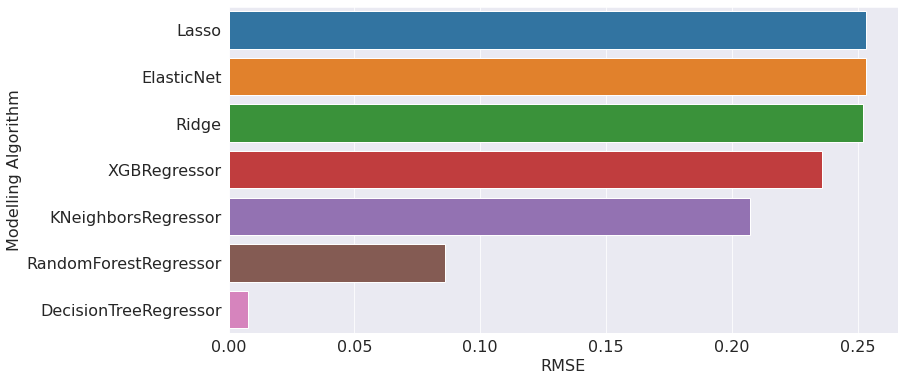

In [ ]:
# Barplot to identify the best performing modelling algorithm
sns.barplot(data=rmse_table, x='RMSE', y='Modelling Algorithm');

# Try different models

In [ ]:
def calculate_rmse(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

## Linear Models
**1. Linear Regression**

In [ ]:
train_rmse, val_rmse = calculate_rmse(LinearRegression())
print('LinearRegression: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

LinearRegression: 
 Train RMSE: 0.2553134440717648, Validation RMSE: 0.2552148602900328


**2. Ridge Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instanciate a Ridge Model
ridge = Ridge()

In [ ]:
# Set list of parameters to test
params = { 'alpha': [0.001, 0.001, 0.01, 1]}

# Grid Search
grid = GridSearchCV(ridge,
                    param_grid=params,
                    scoring=['neg_mean_squared_error'],
                    refit='neg_mean_squared_error',
                    verbose=1, 
                    cv=5)

In [ ]:
# Fit the grid search
grid.fit(X_train, train_targets)
grid.cv_results_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.52371e-20): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.52303e-20): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.5241e-20): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.52228e-20): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.52358e-20): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-condi

{'mean_fit_time': array([0.34252052, 0.31668019, 0.3182271 , 0.31898909]),
 'mean_score_time': array([0.16672373, 0.16030464, 0.16768193, 0.16663866]),
 'mean_test_neg_mean_squared_error': array([-0.0636541 , -0.0636541 , -0.06365409, -0.06365391]),
 'param_alpha': masked_array(data=[0.001, 0.001, 0.01, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 1}],
 'rank_test_neg_mean_squared_error': array([3, 3, 2, 1], dtype=int32),
 'split0_test_neg_mean_squared_error': array([-0.06384428, -0.06384428, -0.06384428, -0.06384462]),
 'split1_test_neg_mean_squared_error': array([-0.06298064, -0.06298064, -0.06298064, -0.06298089]),
 'split2_test_neg_mean_squared_error': array([-0.06370357, -0.06370357, -0.06370357, -0.06370352]),
 'split3_test_neg_mean_squared_error': array([-0.06403658, -0.06403658, -0.06403656, -0.06403505]),
 'split4_test_neg_mean_squared_error': 

In [ ]:
# Check the best estimator
grid.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Use the trained best model
ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
print('Ridge: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Ridge: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

**3. Lasso Regression**

Define cross validation 

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV

cva = RepeatedKFold(n_splits=10, n_repeats = 3, random_state=42)
lasso = LassoCV(alphas=np.arange(0.001,1,.01), cv=cva,n_jobs=-1)

calculate_rmse(lasso)
print('LassoCV: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

LassoCV: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


**4. Elasticnet Regression**

In [ ]:
from sklearn.linear_model import ElasticNetCV

cva = RepeatedKFold(n_splits=10, n_repeats = 3, random_state=42)


elastic = ElasticNetCV(alphas=np.arange(0.001,1,.01), cv=cva,n_jobs=-1)
calculate_rmse(elastic)
print('ElasticNetCV: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

ElasticNetCV: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj'

In [ ]:
import gc
gc.collect()

275

In [ ]:
import lightgbm as lgb

# specify your configurations as a dict
lgbm_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    #'max_depth': 16,
    'num_leaves': 250,
    'learning_rate': 0.019,
    'feature_fraction': 0.50,
    'bagging_fraction': 0.70,
    'verbose': 0
}

In [ ]:
# LGBM Dataset Formatting 
lgtrain = lgb.Dataset(X_train, train_targets,
                categorical_feature = categorical_cols)
lgvalid = lgb.Dataset(X_val, val_targets,
                categorical_feature = categorical_cols)


lgbm = lgb.train(
    lgbm_params,
    lgtrain,
    num_boost_round=16000,
    valid_sets=[lgtrain, lgvalid],
    valid_names=['train','valid'],
    early_stopping_rounds=100,
    verbose_eval=100
)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	train's rmse: 0.226704	valid's rmse: 0.228885
[200]	train's rmse: 0.221956	valid's rmse: 0.226311
[300]	train's rmse: 0.21944	valid's rmse: 0.225592
[400]	train's rmse: 0.217529	valid's rmse: 0.225147
[500]	train's rmse: 0.216114	valid's rmse: 0.22497
[600]	train's rmse: 0.21505	valid's rmse: 0.224853
[700]	train's rmse: 0.214098	valid's rmse: 0.224784
[800]	train's rmse: 0.2133	valid's rmse: 0.224748
[900]	train's rmse: 0.212518	valid's rmse: 0.224702
[1000]	train's rmse: 0.211781	valid's rmse: 0.224681
[1100]	train's rmse: 0.211024	valid's rmse: 0.224656
[1200]	train's rmse: 0.210395	valid's rmse: 0.224651
[1300]	train's rmse: 0.209795	valid's rmse: 0.224641
[1400]	train's rmse: 0.209209	valid's rmse: 0.224628
[1500]	train's rmse: 0.208604	valid's rmse: 0.224633
Early stopping, best iteration is:
[1424]	train's rmse: 0.209067	valid's rmse: 0.224624


In [ ]:
import gc
gc.collect()

95

In [ ]:
print(lgbm.best_score)

NameError: ignored

In [ ]:
# Feature Importance Plot
f, ax = plt.subplots(figsize=[7,10])
lgb.plot_importance(lgbm, max_num_features=50, ax=ax)
plt.title("Light GBM Feature Importance") 

## Tree Based Models


1. Fit & Transform the Decision Tree

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
calculate_rmse(tree)
print('DecisionTreeRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

DecisionTreeRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


2. Plot the tree

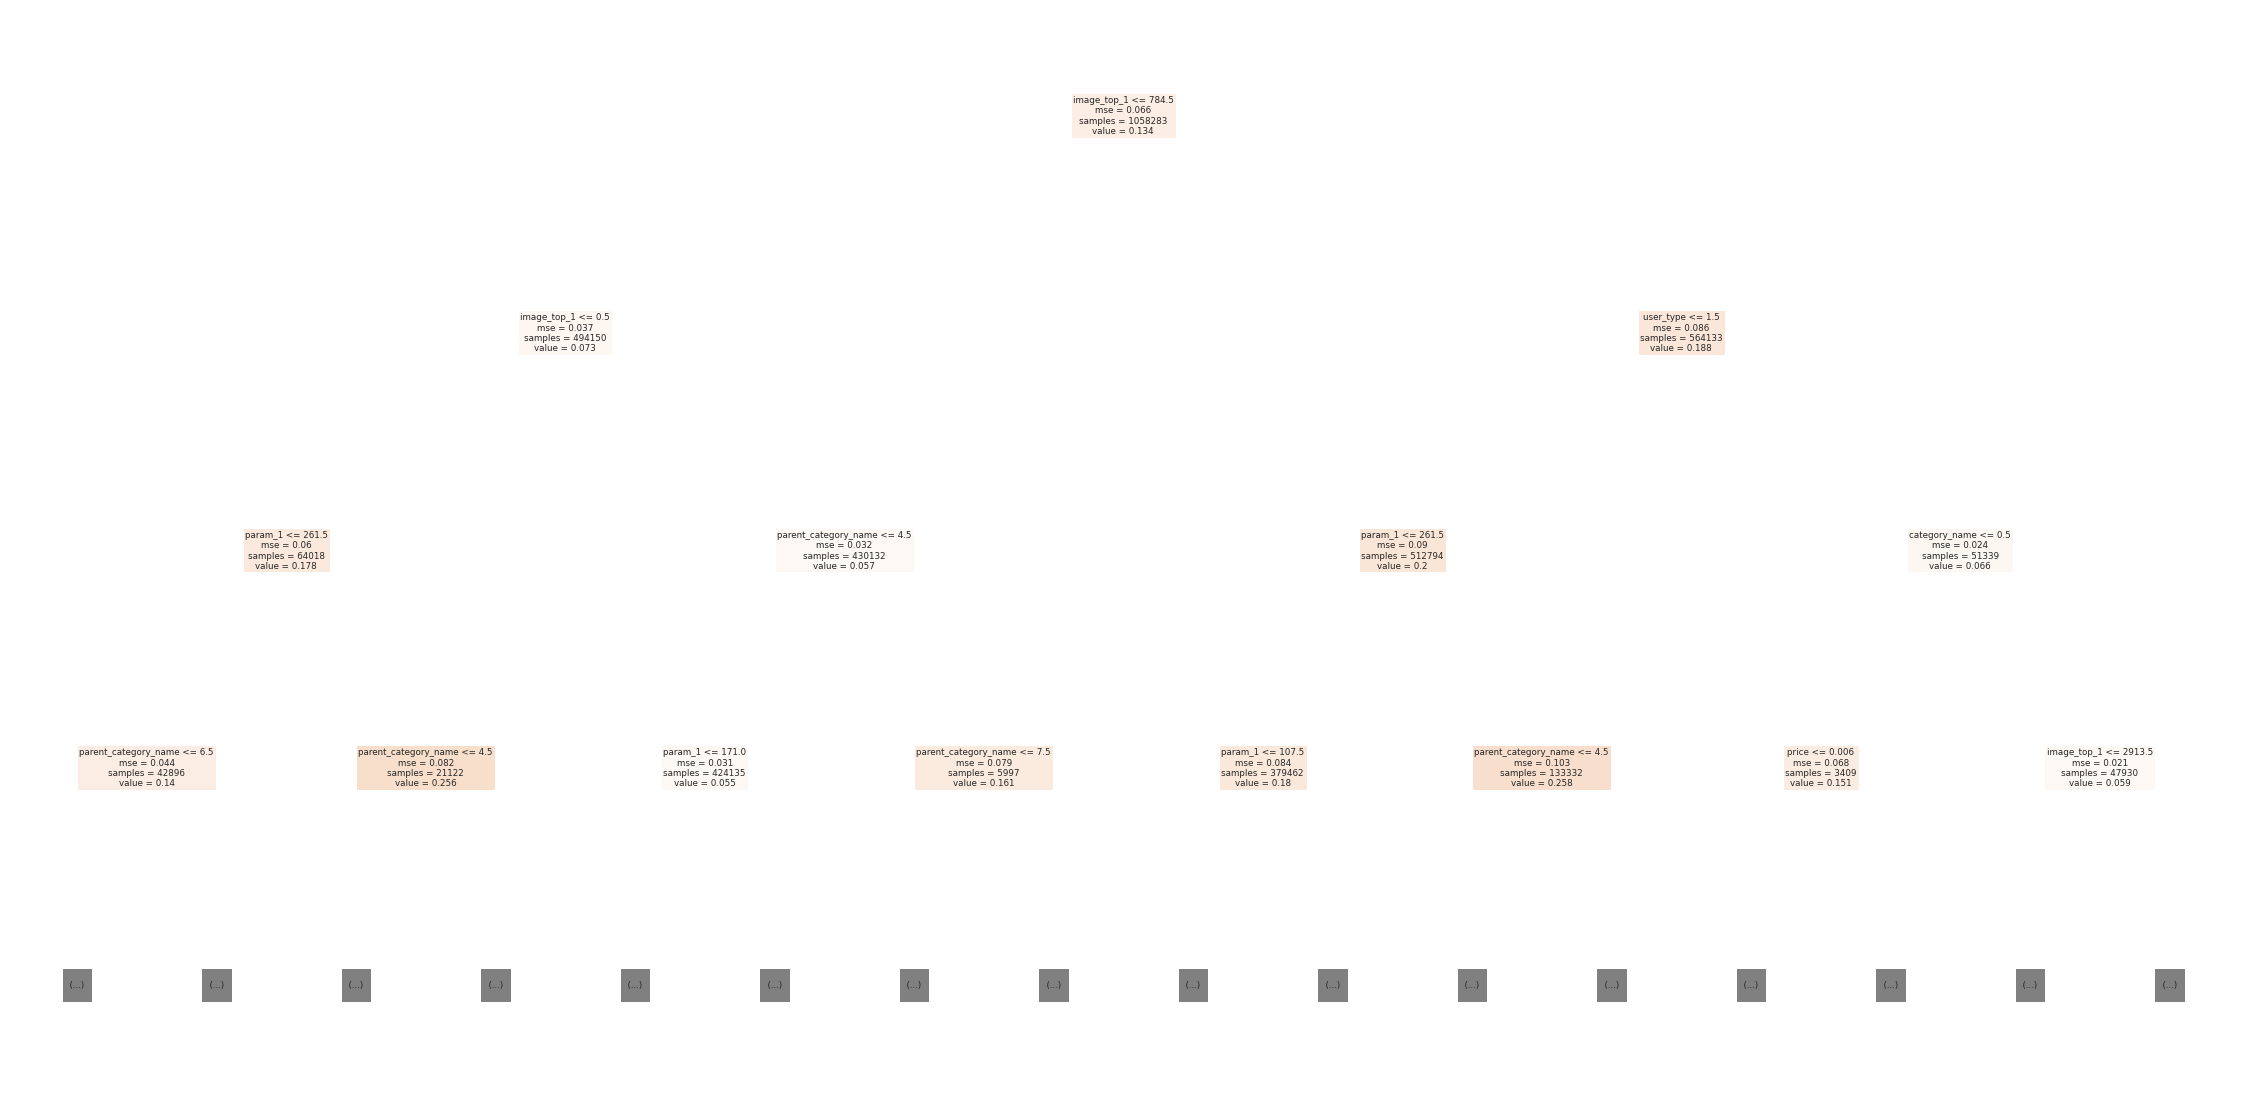

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols + categorical_cols);

3. Visualize the tree using `export_text`.

In [ ]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth=3, feature_names=list(X_train.columns))
# Display the first few lines
print(tree_text[:1000])

|--- image_top_1 <= 784.50
|   |--- image_top_1 <= 0.50
|   |   |--- param_1 <= 261.50
|   |   |   |--- parent_category_name <= 6.50
|   |   |   |   |--- truncated branch of depth 45
|   |   |   |--- parent_category_name >  6.50
|   |   |   |   |--- truncated branch of depth 28
|   |   |--- param_1 >  261.50
|   |   |   |--- parent_category_name <= 4.50
|   |   |   |   |--- truncated branch of depth 35
|   |   |   |--- parent_category_name >  4.50
|   |   |   |   |--- truncated branch of depth 43
|   |--- image_top_1 >  0.50
|   |   |--- parent_category_name <= 4.50
|   |   |   |--- param_1 <= 171.00
|   |   |   |   |--- truncated branch of depth 50
|   |   |   |--- param_1 >  171.00
|   |   |   |   |--- truncated branch of depth 39
|   |   |--- parent_category_name >  4.50
|   |   |   |--- parent_category_name <= 7.50
|   |   |   |   |--- truncated branch of depth 29
|   |   |   |--- parent_category_name >  7.50
|   |   |   |   |--- truncated branch of depth 35
|--- image_top_1 >  784

### Random Forest Regressor

1. Fit & Train the Random Forest Regressor

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
calculate_rmse(rf)
print('RandomForestRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

RandomForestRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
CPU times: user 25min 22s, sys: 9.21 s, total: 25min 31s
Wall time: 13min 1s


#### 2. Feature Importance


In [ ]:
rf.feature_importances_

array([1.33348245e-01, 8.92322653e-02, 1.18350866e-01, 1.34195788e-02,
       1.85184290e-02, 5.42374735e-02, 3.11414754e-02, 1.75724682e-02,
       1.99401079e-01, 2.61605161e-02, 1.64579395e-01, 5.46785218e-06,
       7.63537234e-02, 5.00823288e-02, 7.59668973e-03])

In [ ]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+categorical_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
8,title,0.19940108
10,image_top_1,0.16457939
0,price,0.13334824
2,city,0.11835087
1,region,0.08923227
12,dayofmonth,0.07635372
5,param_1,0.05423747
13,dayofweek,0.05008233
6,param_2,0.03114148
9,user_type,0.02616052


3. Visualize the feature importance

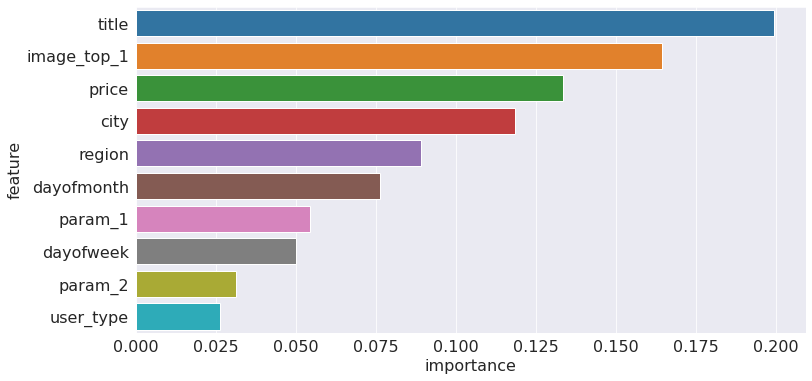

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Observations:

*   `title` is the most important feature
*   `image_top_1` is the second most important feature 
followed by `price`, `city`, `region`.



#### Hyperparameter Tuning and Regularization — Random Forest Regressor

1. Helper Function to find the best hyperparameters for Random Forest Regressor

In [ ]:
def test_params_rf(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

2. Evaluate different hyperparameters

In [ ]:
test_params_rf(n_estimators=10, max_depth=20)

(0.18210052960166037, 0.22952021783356016)

In [ ]:
test_params_rf(n_estimators=20)

(0.09357476012690429, 0.2343774657810433)

In [ ]:
test_params_rf(n_estimators=50)

(0.08833048945262158, 0.23108595913971022)

In [ ]:
test_params_rf(n_estimators=60)

(0.08771635423530832, 0.23071172628358755)

3. Helper function to test and plot different values of a single parameter.

In [ ]:
def test_param_and_plot_rf(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_rf(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

Figuring out the best value if `max_depth`

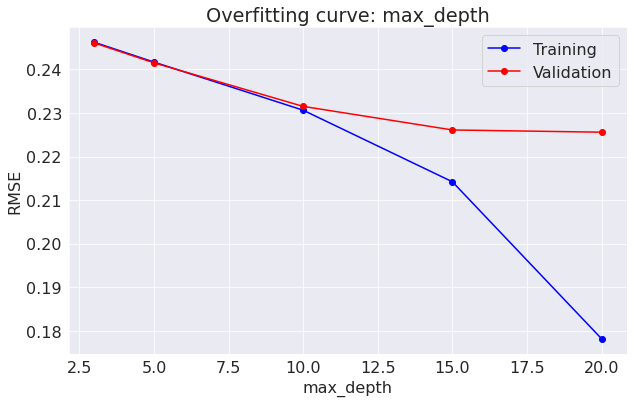

In [ ]:
test_param_and_plot_rf('max_depth', [3, 5, 10, 15, 20])

It seems max_depth of 5 is a good value. 

In [ ]:
test_params_rf(n_estimators=30, max_depth=5, min_samples_leaf=4, max_features=0.4)

(0.24002088518299527, 0.23982550308272407)

In [ ]:
test_params_rf(n_estimators=50, 
            max_depth=5, 
            min_samples_leaf=4, 
            min_samples_split=3,
            max_features='log2', 
            max_leaf_nodes=128, 
            min_impurity_decrease=1e-6, 
            max_samples=0.9
           )

(0.24189895815526363, 0.2417308641040072)

In [ ]:
test_params_rf(n_estimators=50, 
            max_depth=5, 
            min_samples_leaf=4, 
            min_samples_split=3,
            max_leaf_nodes=128, 
            min_impurity_decrease=1e-6, 
            max_samples=0.9
           )

(0.2416624011700664, 0.24149060649953552)

In [ ]:
test_params_rf(n_estimators=50, 
            max_depth=15, 
            min_samples_leaf=4 
           )

(0.21666815622515273, 0.22572572262300794)

In [ ]:
test_params_rf(n_estimators=30, 
            max_depth=15, 
            min_samples_leaf=4 
           )

(0.21671244321579702, 0.22586488978455552)

4. Training the best model

In [ ]:
%%time

tuned_rf1 = RandomForestRegressor(n_estimators=30, 
            max_depth=15)
calculate_rmse(tuned_rf1)
print('RandomForestRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

RandomForestRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
CPU times: user 3min 45s, sys: 619 ms, total: 3min 45s
Wall time: 3min 44s


In [ ]:
tuned_rf2 = RandomForestRegressor(n_estimators=50, 
            max_depth=5, 
            min_samples_leaf=4, 
            min_samples_split=3,
            max_features='log2', 
            max_leaf_nodes=128, 
            min_impurity_decrease=1e-6, 
            max_samples=0.9)
calculate_rmse(tuned_rf2)
print('RandomForestRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

RandomForestRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


5. Feature importance of the best model

In [ ]:
tuned_rf1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tuned_rf1.feature_importances_
}).sort_values('importance', ascending=False)
tuned_rf1_importance_df

,feature,importance
8,image_top_1,0.314471
5,title,0.141803
0,region,0.128309
6,price,0.110244
3,category_name,0.077696
7,user_type,0.057532
4,param_1,0.052946
2,parent_category_name,0.043160
1,city,0.032567
10,dayofmonth,0.024443


6. Visualize the features of the best model 

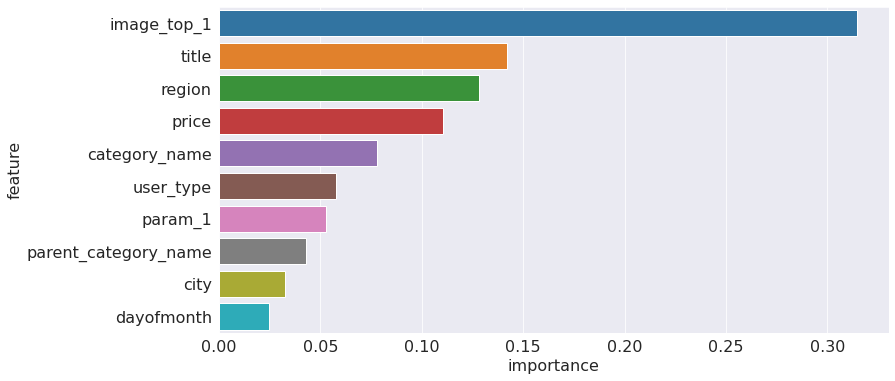

In [ ]:
sns.barplot(data=tuned_rf1_importance_df.head(10), x='importance', y='feature');

`image_top_1` is the most important feature, followed by `title`, `region`, `price`, `category_name`, `user_type`, `param_1`, `parent_category_name`, `city` and `dayofmonth`. 

## k-nearest Neighbor Regressor

In [ ]:
for K in range(20):
    K = K+1
    KNN = KNeighborsRegressor(n_neighbors = K)
    calculate_rmse(KNN)
    print('KNeighborsRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956
KNeighborsRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMS

## Gradient Boosting
1. To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
def test_params_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
%%time
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, n_jobs=-1)

CPU times: user 63 µs, sys: 11 µs, total: 74 µs
Wall time: 79.4 µs


2. Validating the best values of parameters

`n_estimators`

In [ ]:
test_params_xgb(n_estimators=3)

[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.367237261618656, 0.36704509636357796)

In [ ]:
test_params_xgb(n_estimators=5)

[04:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.3303734200170024, 0.3301557395475836)

In [ ]:
test_params_xgb(n_estimators=10)

[04:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.27718293623122764, 0.27693776951051335)

In [ ]:
test_params_xgb(n_estimators=30)

[04:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.2406259076838796, 0.2404160205650328)

In [ ]:
test_params_xgb(n_estimators=50)

[04:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.23831561297895926, 0.23809730366019874)

In [ ]:
test_params_xgb(n_estimators=100)

[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.2358763999180621, 0.2356552611084786)

In [ ]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_xgb(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

Figuring out the best `max_depth`

[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


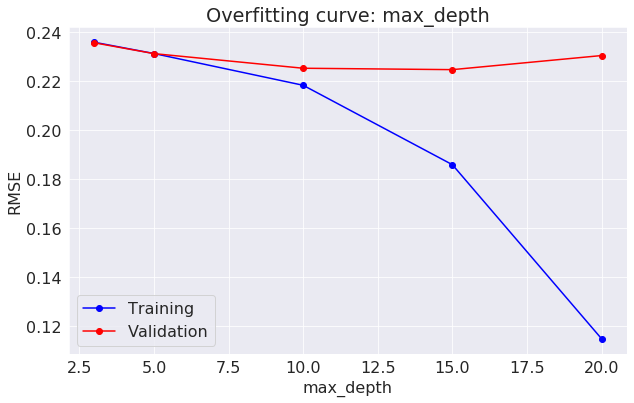

In [ ]:
test_param_and_plot_xgb('max_depth', [3, 5, 10, 15, 20])

`learning_rate`
The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
test_params_xgb(n_estimators=5, learning_rate=0.01)

[04:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.43239104698097375, 0.4322495524332633)

In [ ]:
test_params_xgb(n_estimators=5, learning_rate=0.1)

[04:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.3303734200170024, 0.3301557395475836)

In [ ]:
test_params_xgb(n_estimators=5, learning_rate=0.3)

[04:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.2508116845886116, 0.25057086468250434)

In [ ]:
test_params_xgb(n_estimators=5, learning_rate=0.99)

[04:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.239569033710031, 0.239363104252235)

In [ ]:
test_params_xgb(booster='gbtree')

[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.25805217745940506, 0.25781315803532834)

Putting it Together and Making Predictions


In [ ]:
xgb = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=5, 
                     learning_rate=0.01, max_depth=5)
calculate_rmse(xgb)
print('XGBRegressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[04:55:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor: 
 Train RMSE: 0.25229332234686774, Validation RMSE: 0.25230240382189956


3. Visualize the individual trees using `plot_tree`.

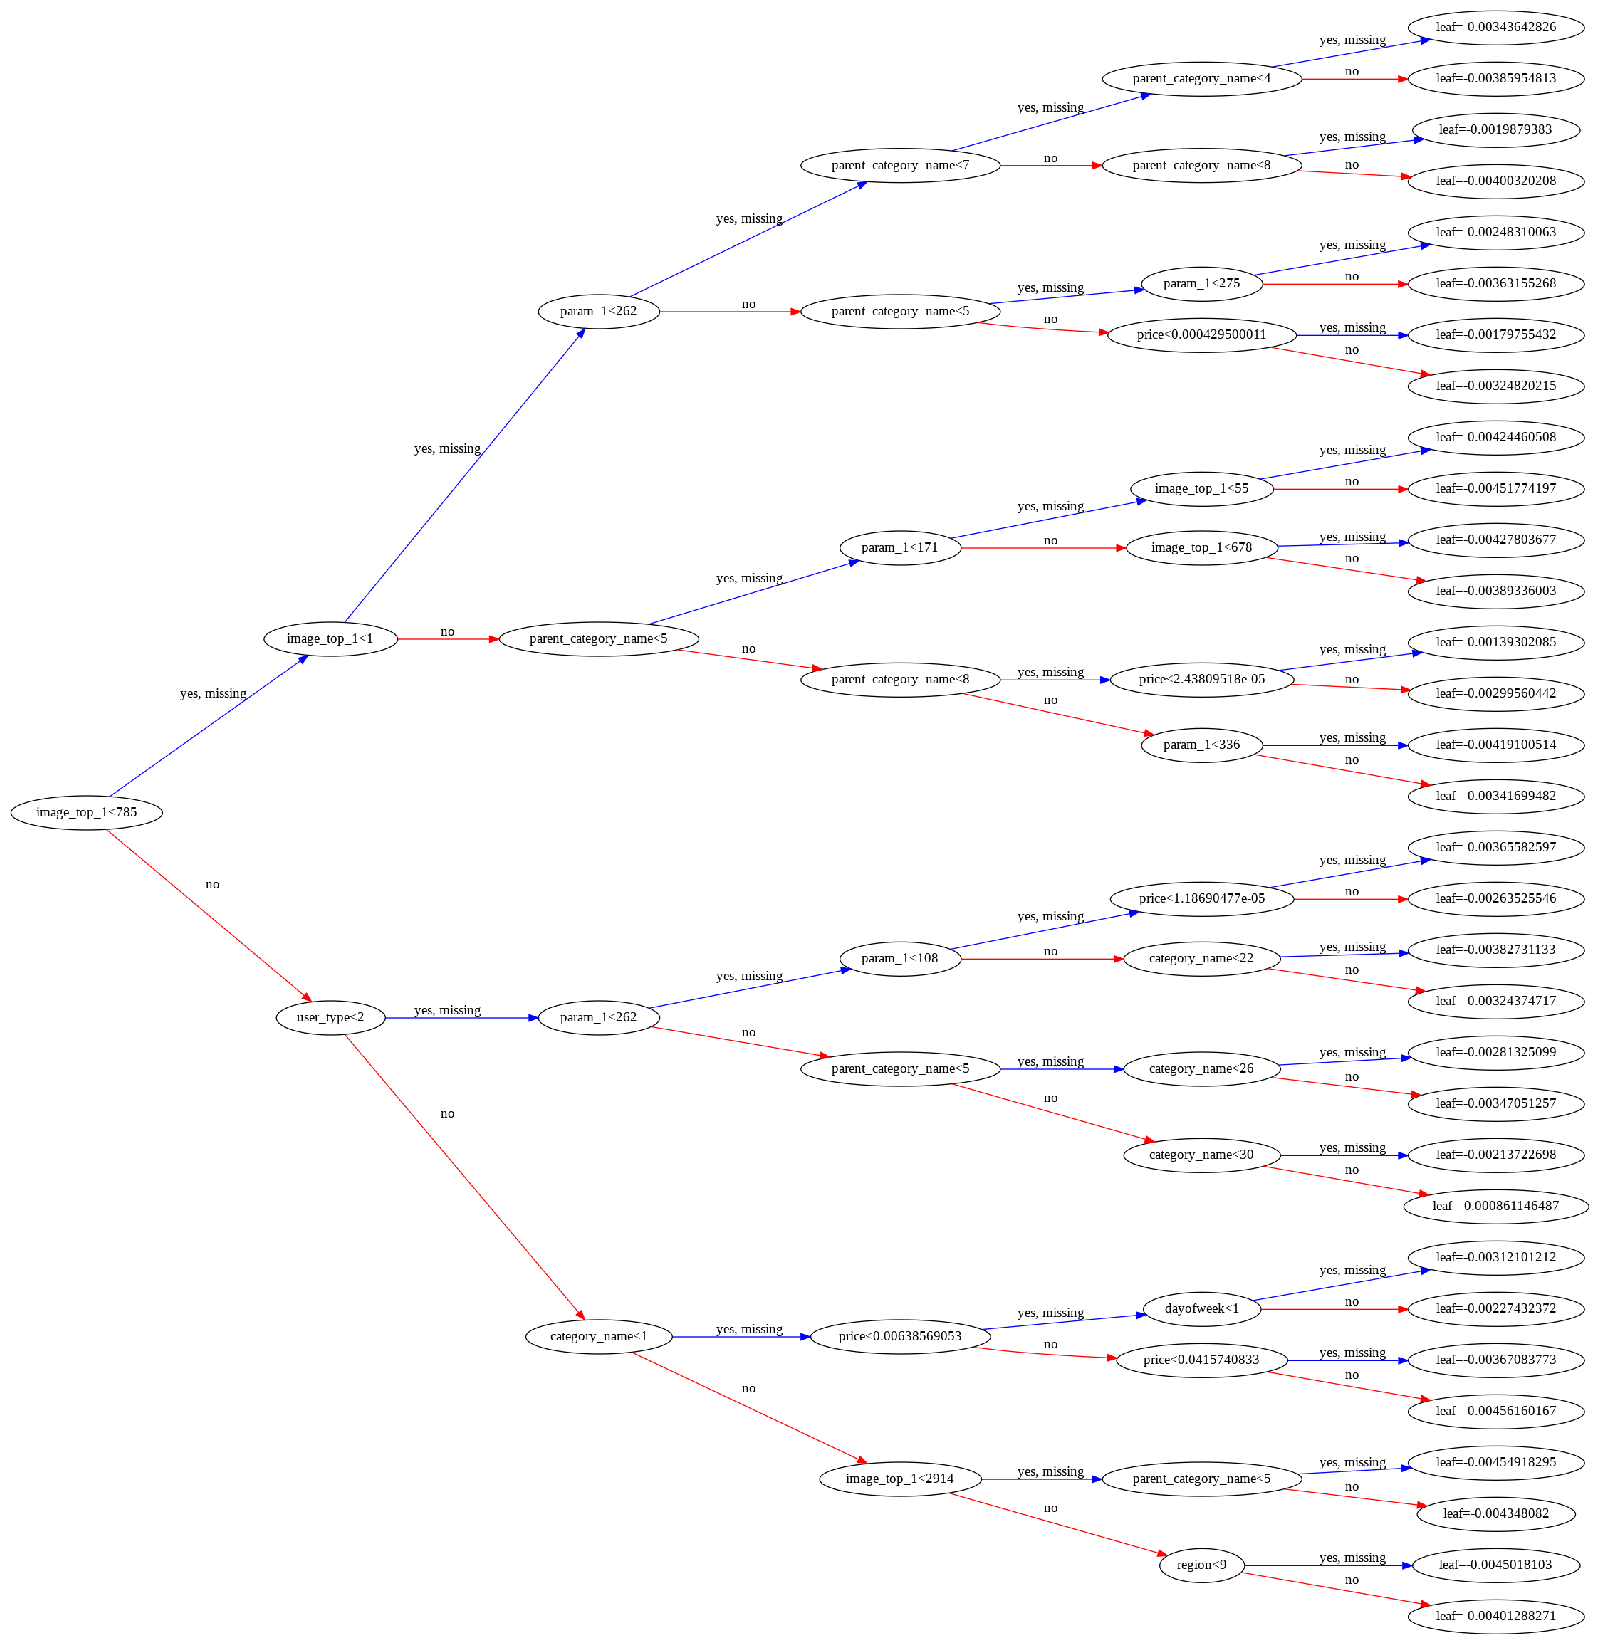

In [ ]:
from matplotlib.pylab import rcParams
from xgboost import plot_tree

%matplotlib inline

rcParams['figure.figsize'] = 30,30
plot_tree(xgb, rankdir='LR');

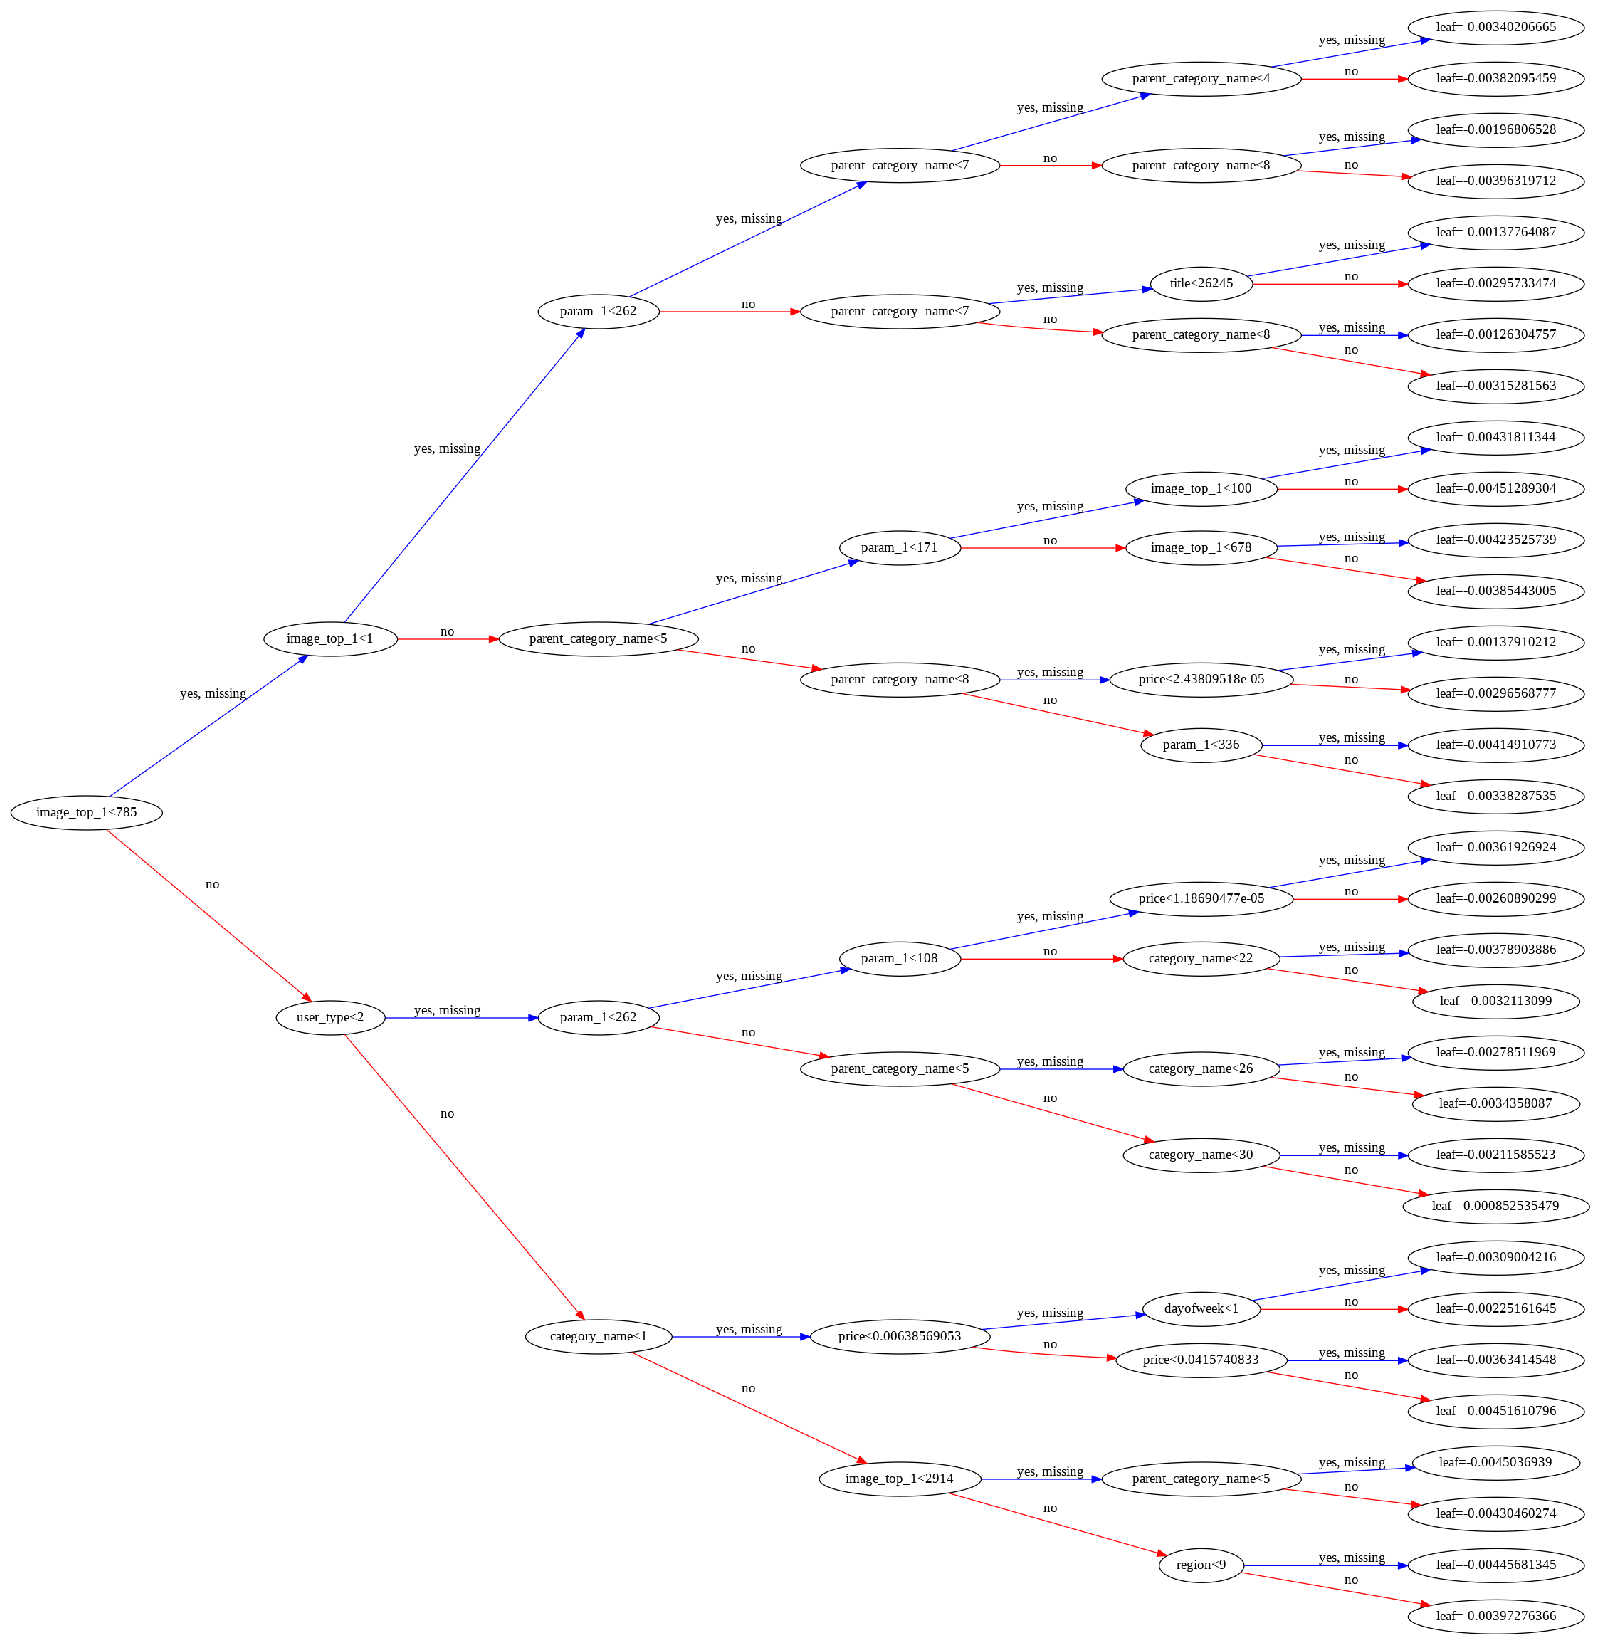

In [ ]:
plot_tree(xgb, rankdir='LR', num_trees=1);

3. Visualize the tree as text.

In [ ]:
xgb_trees = xgb.get_booster().get_dump()
len(xgb_trees)

5

In [ ]:
print(xgb_trees[0])

0:[image_top_1<785] yes=1,no=2,missing=1
	1:[image_top_1<1] yes=3,no=4,missing=3
		3:[param_1<262] yes=7,no=8,missing=7
			7:[parent_category_name<7] yes=15,no=16,missing=15
				15:[parent_category_name<4] yes=31,no=32,missing=31
					31:leaf=-0.00343642826
					32:leaf=-0.00385954813
				16:[parent_category_name<8] yes=33,no=34,missing=33
					33:leaf=-0.0019879383
					34:leaf=-0.00400320208
			8:[parent_category_name<5] yes=17,no=18,missing=17
				17:[param_1<275] yes=35,no=36,missing=35
					35:leaf=-0.00248310063
					36:leaf=-0.00363155268
				18:[price<0.000429500011] yes=37,no=38,missing=37
					37:leaf=-0.00179755432
					38:leaf=-0.00324820215
		4:[parent_category_name<5] yes=9,no=10,missing=9
			9:[param_1<171] yes=19,no=20,missing=19
				19:[image_top_1<55] yes=39,no=40,missing=39
					39:leaf=-0.00424460508
					40:leaf=-0.00451774197
				20:[image_top_1<678] yes=41,no=42,missing=41
					41:leaf=-0.00427803677
					42:leaf=-0.00389336003
			10:[parent_category_name<8] yes=

4. Feature importance score for each column in the input.

In [ ]:
xgb_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)
xgb_importance_df.head(10)

,feature,importance
8,image_top_1,0.381715
7,user_type,0.368937
5,title,0.103725
4,param_1,0.048811
3,category_name,0.047487
0,region,0.030853
6,price,0.016776
1,city,0.001379
12,dayofweek,0.000316
2,parent_category_name,0.000000


5. Visualize the feature importance of Gradient Boost model

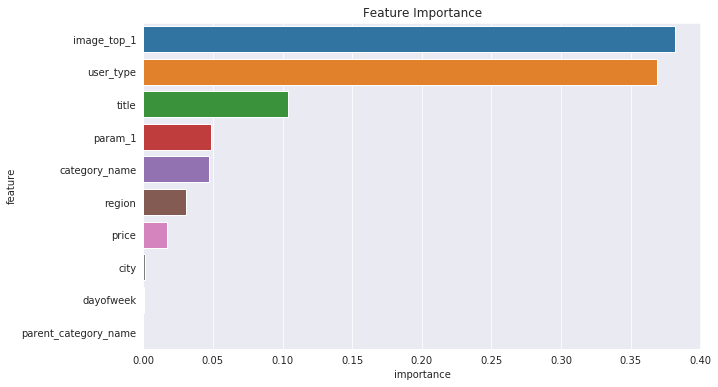

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=xgb_importance_df.head(10), x='importance', y='feature');

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'

## Apply on Test Data : apply steps 1-3 namely and then do prediction
* Apply single imputation,
* Select only variables which are used for training
* LabelEncode variables 4: make sure test data again has exact same number of variables as training !


# Making Predictions on Single Inputs

---




In [ ]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[categorical_cols] = input_df[categorical_cols].apply(LabelEncoder().fit_transform)
    X_input = input_df[numeric_cols + categorical_cols]
    pred = model.predict(X_input)[0]
    return pred 

In [ ]:
sample_input = {
    'region': 4,
    'city': 9,
    'parent_category_name': 10,
    'category_name': 22,
    'param_1': 12,
    #'param_2': 21,
    #'param_3': 1,
    'price': 6780.0,
    'title': 17,
    'user_type': 99,
    'image_top_1': 88,
    'month': 3,
    'dayofmonth': 28,
    'dayofweek': 4,
    'isweekend': 5}
 											
sample_input

{'category_name': 22,
 'city': 9,
 'dayofmonth': 28,
 'dayofweek': 4,
 'image_top_1': 88,
 'isweekend': 5,
 'month': 3,
 'param_1': 12,
 'parent_category_name': 10,
 'price': 6780.0,
 'region': 4,
 'title': 17,
 'user_type': 99}

In [ ]:
predicated_deal_prob = predict_input(tuned_rf1, sample_input)

In [ ]:
print('The predicted deal probability for Online ad demand is {}'.format(predicated_deal_prob))

The predicted deal probability for Online ad demand is 0.08480802741573033


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj'

## Making a submission on Kaggle


In [ ]:
test_preds = tuned_rf1.predict(X_test)
len(test_preds)

508438

In [ ]:
print(test_preds)

[0.08591384 0.13528419 0.3250365  ... 0.03864912 0.31122205 0.05903478]


In [ ]:
submission_df = pd.read_csv('sample_submission.csv')

In [ ]:
submission_df

,item_id,deal_probability
0,6544e41a8817,0.5
1,65b9484d670f,0.5
2,8bab230b2ecd,0.5
3,8e348601fefc,0.5
4,8bd2fe400b89,0.5
...,...,...
508433,9f2200aed300,0.5
508434,70813f518de4,0.5
508435,a22a2eeb5dd2,0.5
508436,ed7fbb0733c1,0.5


In [ ]:
submission_df.item_id.duplicated().any()

False

In [ ]:
submission_df['deal_probability'] = test_preds.astype('float')

In [ ]:
submission_df.fillna(0, inplace=True)

In [ ]:
submission_df.isna().sum()

item_id             0
deal_probability    0
dtype: int64

In [ ]:
submission_df.to_csv('submission.csv', index=False, header=1)

In [ ]:
!head submission.csv

item_id,deal_probability
6544e41a8817,0.08591384204294825
65b9484d670f,0.13528419010355505
8bab230b2ecd,0.32503650167497367
8e348601fefc,0.13600085593891223
8bd2fe400b89,0.2170211146183067
c63dbd6c657f,0.15232535453709897
6d1a410df86e,0.07436220158310809
e8d3e7922b80,0.03268213150624521
2bc1ab208462,0.08052964067089853


Random Forest gave the best metric (RMSE). I could improve the Kaggle score from `0.29655` to `0.24857`. 

Kaggle score: `0.29655`
![](https://imgur.com/E7VQmhx.png)



```
RandomForestRegressor(n_estimators=30, 
            max_depth=15)
```
![](https://imgur.com/Yd84f6d.png)


In [ ]:
# To download the csv file locally
from google.colab import files
submission_df.to_csv('submission.csv', index=False)         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Saving the model

In [ ]:
import joblib

In [ ]:
online_ad_demand_rf = {
    'model': tuned_rf1,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
    }

In [ ]:
joblib.dump(online_ad_demand_rf, 'online_ad_demand_tuned_rf1.joblib')

['online_ad_demand_tuned_rf1.joblib']

In [ ]:
jovian.commit(outputs=['online_ad_demand_tuned_rf1.joblib'])


[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "online_ad_demand_tuned_rf1.joblib" (not found)


Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj'

# Summary and Insights 

In this notebook we explored Supervised Machine Learning methods. Regression models such as linear regression, lasso, elasticnet, ridge, decision tree and ensemble models such as RandomForest, XGBoost, LightGBM were trained to predict weekly sales using **Scikit Learn**, **LightGBM** and **XGBoost**.  We used **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** and **Plotly** to perform the exploratory data analysis and gather insights for machine learning.

- Our dataset had 2,011,862 rows ( train = 1,503,424, test = 5,08,438) and 17 columns. 

-  We first removed the data where there was less than 20% null values. 

- Then, removed the duplicates. 

- The data was highly skewed, so removed the outliners. 

- We did exploratory data analysis to identify patterns in the data. 

- Imputed the train and test using KNN Imputer.

- Normalized the train and test data using MinMaxScaler. 

- Transformed the train and test data using LabelEncoder. 

- Split the into train, validation datasets.

- Trained Linear Models, Tree based models and Ensemble models. 

- Decision trees performed better as they are non-linear models but they also tend to overfit the data if unbounded. 

- Ensemble models such as Random Forest reduce overfitting by bagging the results of multiple decision trees. We also explored XGBoost and Light GBM which use boosting techniques by training a bunch of weaker models.

- **Random Forest** performed the best upon performing hyperparameter tuning.   

 - **Best 10 predictors** of weekly sales were as follows

 ![](https://imgur.com/hxtssPn.png)

`image_top_1` is the most important feature, followed by `title`, `region`, `price`, `category_name`, `user_type`, `param_1`, `parent_category_name`, `city` and `dayofmonth`. 

# Future Work

Apply the below:
- Different Test Val Split
- Detailed Feature selection and Feature Engineering
- Use TFID for columns description, title  
- Stacking models
- Implement using pipleline 
- Run the entire data
- Try implementing using DASK

# References

- Linear Regression with Scikit-Learn Jovian Aakash N S 
- How to approach Machine Learning Problems Jovian Aakash N S
- Gradient Boosting Machines with XGBoost Jovian Aakash N S
- Scikit Learn Supervised Learning documentation
- Light GBM documentation
- XGBoost documentation
- https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance
- Tune Learning Rate for Gradient Boosting with XGBoost in Python Machine Learning Mastery
- Kaggle Notebooks
  - https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-notebook-avito
  - https://www.kaggle.com/tunguz/bow-meta-text-and-dense-features-lb-0-2241
  - https://www.kaggle.com/kailex/xgb-text2vec-tfidf-0-2237
  


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project


'https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-project'